# **Latar Belakang**

**Transjakarta** adalah sistem transportasi Bus Rapid Transit (BRT) yang beroperasi sejak tahun 2004 di Jakarta. Transjakarta yang dilengkapi jalur bus khusus, terminal bus modern dan sistem pembayaran kartu pintar, menjadikannya salah satu sistem BRT paling terkemuka secara global. Sistem ini dirancang untuk memberikan moda transportasi yang nyaman, terjangkau bagi pengguna sekaligus mengurangi ketergantungan pada kendaraan pribadi dan meminimalkan dampak lingkungan.

Meskipun demikian, tantangan utama Transjakarta terletak pada meningkatkan kepuasan pengguna. Fokus pada perbaikan layanan yang mengakomodasi kebutuhan pengguna menjadi poin penting untuk mengembangkan sistem ini.

Pengumpulan data di bulan April 2023 menjadi fondasi utama bagi Transjakarta dalam memahami kebutuhan pengguna, mengevaluasi efisiensi layanan, serta merencanakan perbaikan dan inovasi yang sesuai. Ini memberi peluang bagi perusahaan untuk terus meningkatkan pengalaman pengguna dan menyesuaikan layanan dengan kebutuhan yang terus berubah di Jakarta.

# **Pernyataan Masalah**

Transjakarta ingin memahami **profil penggunanya** dengan lebih baik. Informasi ini penting untuk meningkatkan kualitas layanan secara tepat sasaran. Sebagai seorang data analis, fokus saya adalah menjawab dua pertanyaan utama:

- **Bagaimana karakteristik umum pengguna Transjakarta?**
- **Bagaimana proses pengembangan Transjakarta dapat lebih memenuhi kebutuhan pengguna secara efektif?**

# **Rumusan Masalah**

**Bagaimana karakteristik umum pengguna Transjakarta?**
- Bagaimana distribusi gender pengguna Transjakarta?
- Bagaimana distribusi usia pengguna Transjakarta?
- Apa jenis bank yang paling umum digunakan oleh pengguna dalam pembayaran Transjakarta?

**Bagaimana proses pengembangan Transjakarta dapat lebih memenuhi kebutuhan pengguna secara efektif?**
- Bagaimana distribusi penggunaan layanan jam sibuk (peak hours) Transjakarta dalam sehari?
- Bagaimana perbandingan jumlah pengguna Transjakarta antara hari kerja dan akhir pekan?
- Halte mana yang paling sering dijadikan tempat "tap in" dan "tap out" oleh pengguna TransJakarta?
- Koridor mana yang menjadi favorit pengguna TransJakarta dengan frekuensi penggunaan tertinggi?

# **Data Understanding**
- **transID**: ID unik untuk setiap transaksi yang terjadi.
- **payCardID**: Identifikasi utama pelanggan yang digunakan sebagai tiket masuk dan keluar.
- **payCardBank**: Nama bank penerbit kartu pelanggan.
- **payCardName**: Nama pelanggan yang tercatat di kartu.
- **payCardSex**: Jenis kelamin pelanggan yang tercatat di kartu.
- **payCardBirthDate**: Tanggal lahir pelanggan.
- **corridorID**: ID Koridor atau Rute yang digunakan sebagai kunci pengelompokan rute.
- **corridorName**: Nama Koridor atau Rute yang mencakup titik awal dan akhir setiap rute.
- **direction**: Indikator arah rute, dengan 0 untuk pergi, 1 untuk kembali.
- **tapInStops**: ID untuk pintu masuk yang mengidentifikasi nama perhentian.
- **tapInStopsName**: Nama tempat di mana pelanggan melakukan tap in.
- **tapInStopsLat**: Kolom yang berisi garis lintang (latitude) tempat pelanggan melakukan tap in.
- **tapInStopsLon**: Kolom yang berisi bujur (longitude) tempat pelanggan melakukan tap in.
- **stopStartSeq**: Urutan pemberhentian yang terkait dengan arah perjalanan.
- **tapInTime**: Waktu tap in, mencakup tanggal dan jam.
- **tapOutStops**: ID untuk pintu keluar yang mengidentifikasi nama perhentian.
- **tapOutStopsName**: Nama tempat di mana pelanggan melakukan tap out.
- **tapOutStopsLat**: Kolom yang berisi garis lintang (latitude) tempat pelanggan melakukan tap out.
- **tapOutStopsLon**: Kolom yang berisi bujur (longitude) tempat pelanggan melakukan tap out.
- **stopEndSeq**: Urutan pemberhentian yang terkait dengan arah perjalanan.
- **tapOutTime**: Waktu tap out, mencakup tanggal dan jam.
- **payAmount**: Jumlah yang dibayarkan oleh pelanggan, termasuk transaksi gratis maupun berbayar.

In [1145]:
# Library untuk numpy dan dataframe
import numpy as np
import pandas as pd

# Library untuk visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

# Library untuk statistics
from scipy.stats import iqr
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

# **Load Dataset**

In [1146]:
df = pd.read_csv('Transjakarta.csv')
df

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0


# **1. Data Cleaning**

*Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset dan perlu ditangani dalam tahapan data cleaning.*

In [1147]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (37900, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-nul

### **a. Handling missing values**

In [1148]:
# mengecek missing value di tiap kolom
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

**1. Handling missing value pada kolom kategorik**

*Kolom kategorik : corridorID, corridorName, tapInStops, tapOutStops, tapOutStopsName*

*Mode membantu mempertahankan distribusi atau pola dari data kategorikal.
Mode adalah nilai yang paling umum muncul dalam sebuah kolom. Penggantian nilai yang hilang dengan mode dapat menjaga konsistensi data, karena mode merepresentasikan nilai yang sering muncul dan tidak memengaruhi secara signifikan statistik keseluruhan.*

In [1149]:
# menghitung nilai yang paling sering muncul dalam kolom 'corridorID'
df['corridorID'].mode()

0    1T
Name: corridorID, dtype: object

In [1150]:
# mengisi nilai yang hilang dalam kolom 'corridorID' dengan nilai mode
df['corridorID'] = df['corridorID'].fillna(value=df['corridorID'].mode()[0])

In [1151]:
# menghitung nilai yang paling sering muncul dalam kolom 'corridorName'
df['corridorName'].mode()

0    Cibubur - Balai Kota
Name: corridorName, dtype: object

In [1152]:
# mengisi nilai yang hilang dalam kolom 'corridorName' dengan nilai mode
df['corridorName'] = df['corridorName'].fillna(value=df['corridorName'].mode()[0])

In [1153]:
# menghitung nilai yang paling sering muncul dalam kolom 'tapInStops'
df['tapInStops'].mode()

0    P00170
Name: tapInStops, dtype: object

In [1154]:
# mengisi nilai yang hilang dalam kolom 'tapInStops' dengan nilai mode
df['tapInStops'] = df['tapInStops'].fillna(value=df['tapInStops'].mode()[0])

In [1155]:
# menghitung nilai yang paling sering muncul dalam kolom 'tapOutStops'
df['tapOutStops'].mode()

0    P00016
Name: tapOutStops, dtype: object

In [1156]:
# mengisi nilai yang hilang dalam kolom 'tapOutStops' dengan nilai mode
df['tapOutStops'] = df['tapOutStops'].fillna(value=df['tapOutStops'].mode()[0])

In [1157]:
# menghitung nilai yang paling sering muncul dalam kolom 'tapOutStopsName'
df['tapOutStopsName'].mode()

0    BKN
Name: tapOutStopsName, dtype: object

In [1158]:
# mengisi nilai yang hilang dalam kolom 'tapOutStopsName' dengan nilai mode
df['tapOutStopsName'] = df['tapOutStopsName'].fillna(value=df['tapOutStopsName'].mode()[0])

**2. Handling missing value pada kolom numerik**

*Kolom numerik: tapOutStopsLat, tapOutStopsLon, stopEndSeq, payAmount*

*Ketika data tidak terdistribusi secara normal, penggunaan median lebih sesuai daripada mean karena median tidak terpengaruh oleh skewness atau distribusi yang tidak simetris.*

In [1159]:
# Mengetahui index berapa saja pada kolom tapOutStopsLat yang memiliki null value
index_missing_tapOutStopsLat = df[df['tapOutStopsLat'].isna()].index
index_missing_tapOutStopsLat
df['tapOutStopsLat'].loc[index_missing_tapOutStopsLat]

6       NaN
30      NaN
70      NaN
130     NaN
192     NaN
         ..
37738   NaN
37762   NaN
37777   NaN
37796   NaN
37799   NaN
Name: tapOutStopsLat, Length: 1344, dtype: float64

<Axes: xlabel='tapOutStopsLat', ylabel='Count'>

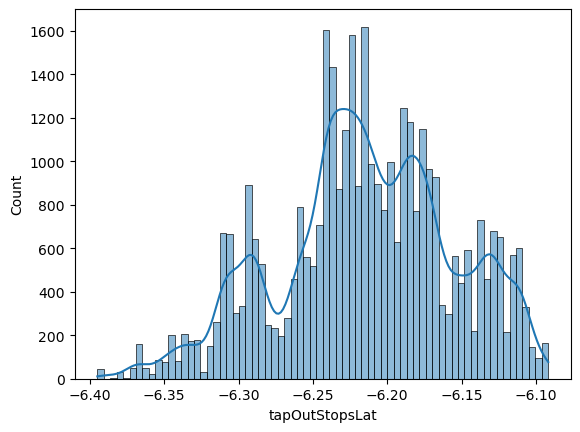

In [1160]:
# Mengetahui normal atau tidaknya distribusi data pada kolom tapOutStopsLat
sns.histplot(data=df, x='tapOutStopsLat', kde=True)

In [1161]:
df['tapOutStopsLat'].skew()
# left skewed

-0.22590932385496618

In [1162]:
# Persebaran data pada kolom tapOutStopsLat tidak terdistribusi normal. Oleh karena itu mengisi missing value dengan nilai median
df['tapOutStopsLat'] = df['tapOutStopsLat'].fillna(value=df['tapOutStopsLat'].median())

In [1163]:
# Memastikan nilai dari index missing value tersebut telah terisi oleh nilai median
df['tapOutStopsLat'].loc[index_missing_tapOutStopsLat]

6       -6.214718
30      -6.214718
70      -6.214718
130     -6.214718
192     -6.214718
           ...   
37738   -6.214718
37762   -6.214718
37777   -6.214718
37796   -6.214718
37799   -6.214718
Name: tapOutStopsLat, Length: 1344, dtype: float64

In [1164]:
# Mengetahui index berapa saja pada kolom tapOutStopsLon yang memiliki null value
index_missing_tapOutStopsLon = df[df['tapOutStopsLon'].isna()].index
index_missing_tapOutStopsLon
df['tapOutStopsLon'].loc[index_missing_tapOutStopsLon]

6       NaN
30      NaN
70      NaN
130     NaN
192     NaN
         ..
37738   NaN
37762   NaN
37777   NaN
37796   NaN
37799   NaN
Name: tapOutStopsLon, Length: 1344, dtype: float64

<Axes: xlabel='tapOutStopsLon', ylabel='Count'>

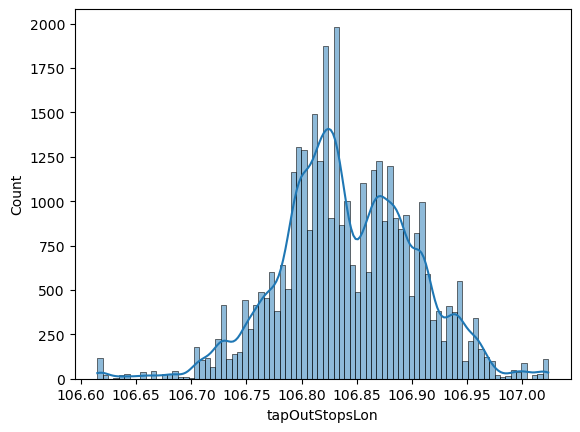

In [1165]:
# Mengetahui normal atau tidaknya distribusi data pada kolom tapOutStopsLon
sns.histplot(data=df, x='tapOutStopsLon', kde=True)

In [1166]:
df['tapOutStopsLon'].skew()
# left skewed

-0.09632678898778703

In [1167]:
# Persebaran data pada kolom tapOutStopsLon tidak terdistribusi normal. Oleh karena itu mengisi missing value dengan nilai median
df['tapOutStopsLon'] = df['tapOutStopsLon'].fillna(value=df['tapOutStopsLon'].median())

In [1168]:
# Memastikan nilai dari index missing value tersebut telah terisi oleh nilai median
df['tapOutStopsLon'].loc[index_missing_tapOutStopsLon]

6        106.83458
30       106.83458
70       106.83458
130      106.83458
192      106.83458
           ...    
37738    106.83458
37762    106.83458
37777    106.83458
37796    106.83458
37799    106.83458
Name: tapOutStopsLon, Length: 1344, dtype: float64

In [1169]:
# Mengetahui index berapa saja pada kolom stopEndSeq yang memiliki null value
index_missing_stopEndSeq = df[df['stopEndSeq'].isna()].index
index_missing_stopEndSeq
df['stopEndSeq'].loc[index_missing_stopEndSeq]

6       NaN
30      NaN
70      NaN
130     NaN
192     NaN
         ..
37738   NaN
37762   NaN
37777   NaN
37796   NaN
37799   NaN
Name: stopEndSeq, Length: 1344, dtype: float64

<Axes: xlabel='stopEndSeq', ylabel='Count'>

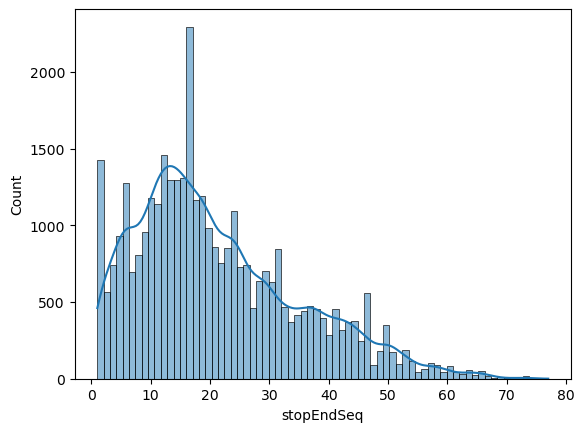

In [1170]:
# Mengetahui normal atau tidaknya distribusi data pada kolom stopEndSeq
sns.histplot(data=df, x='stopEndSeq', kde=True)

In [1171]:
df['stopEndSeq'].skew()
# right skewed

0.8153845675869085

In [1172]:
# Persebaran data pada kolom stopEndSeq tidak terdistribusi normal. Oleh karena itu mengisi missing value dengan nilai median
df['stopEndSeq'] = df['stopEndSeq'].fillna(value=df['stopEndSeq'].median())

In [1173]:
# Memastikan kini nilai dari index missing value tersebut telah terisi oleh nilai median
df['stopEndSeq'].loc[index_missing_stopEndSeq]

6        18.0
30       18.0
70       18.0
130      18.0
192      18.0
         ... 
37738    18.0
37762    18.0
37777    18.0
37796    18.0
37799    18.0
Name: stopEndSeq, Length: 1344, dtype: float64

In [1174]:
# Mengetahui index berapa saja pada kolom payAmount yang memiliki null value
index_missing_payAmount = df[df['payAmount'].isna()].index
index_missing_payAmount
df['payAmount'].loc[index_missing_payAmount]

11      NaN
76      NaN
97      NaN
169     NaN
198     NaN
         ..
37661   NaN
37674   NaN
37741   NaN
37861   NaN
37882   NaN
Name: payAmount, Length: 1007, dtype: float64

<Axes: xlabel='payAmount', ylabel='Count'>

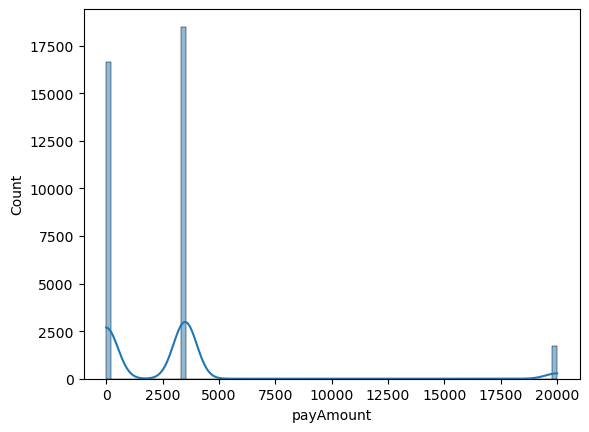

In [1175]:
# Mengetahui normal atau tidaknya distribusi data pada kolom payAmount
sns.histplot(data=df, x='payAmount', kde=True)

In [1176]:
df['payAmount'].skew()
# right skewed

3.156257811008617

In [1177]:
# Persebaran data pada kolom payAmount tidak terdistribusi normal. Oleh karena itu mengisi missing value dengan nilai median
df['payAmount'] = df['payAmount'].fillna(value=df['payAmount'].median())

In [1178]:
# Memastikan kini nilai dari index missing value tersebut telah terisi oleh nilai median
df['payAmount'].loc[index_missing_payAmount]

11       3500.0
76       3500.0
97       3500.0
169      3500.0
198      3500.0
          ...  
37661    3500.0
37674    3500.0
37741    3500.0
37861    3500.0
37882    3500.0
Name: payAmount, Length: 1007, dtype: float64

**3. Handling missing value pada kolom 'tapOutTime'**

In [1179]:
# Mengubah type data kolom 'tapOutTime' dari object menjadi datetime
# tapOutTime -> waktu tap out, mencakup tanggal dan jam
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])

In [1180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           37900 non-null  object        
 1   payCardID         37900 non-null  int64         
 2   payCardBank       37900 non-null  object        
 3   payCardName       37900 non-null  object        
 4   payCardSex        37900 non-null  object        
 5   payCardBirthDate  37900 non-null  int64         
 6   corridorID        37900 non-null  object        
 7   corridorName      37900 non-null  object        
 8   direction         37900 non-null  float64       
 9   tapInStops        37900 non-null  object        
 10  tapInStopsName    37900 non-null  object        
 11  tapInStopsLat     37900 non-null  float64       
 12  tapInStopsLon     37900 non-null  float64       
 13  stopStartSeq      37900 non-null  int64         
 14  tapInTime         3790

In [1181]:
# Mengetahui index berapa saja pada kolom tapOutTime yang memiliki null value
index_missing_tapOutTime = df[df['tapOutTime'].isna()].index
index_missing_tapOutTime
df['tapOutTime'].loc[index_missing_tapOutTime]

6       NaT
30      NaT
70      NaT
130     NaT
192     NaT
         ..
37738   NaT
37762   NaT
37777   NaT
37796   NaT
37799   NaT
Name: tapOutTime, Length: 1344, dtype: datetime64[ns]

In [1182]:
# Tidak bisa mengisi missing value dengan nilai mode karena lebih dari 1
df['tapOutTime'].mode()

0   2023-04-07 19:44:04
1   2023-04-10 19:10:15
2   2023-04-17 18:14:19
3   2023-04-18 07:24:15
4   2023-04-19 07:31:23
5   2023-04-19 19:13:02
6   2023-04-20 10:29:57
7   2023-04-24 06:53:50
Name: tapOutTime, dtype: datetime64[ns]

In [1183]:
# mengisi missing value dengan nilai median
df['tapOutTime'] = df['tapOutTime'].fillna(value=df['tapOutTime'].median())

In [1184]:
# Memastikan nilai dari index missing value tersebut telah terisi oleh nilai median
df['tapOutTime'].loc[index_missing_tapOutTime]

6       2023-04-16 19:03:14
30      2023-04-16 19:03:14
70      2023-04-16 19:03:14
130     2023-04-16 19:03:14
192     2023-04-16 19:03:14
                ...        
37738   2023-04-16 19:03:14
37762   2023-04-16 19:03:14
37777   2023-04-16 19:03:14
37796   2023-04-16 19:03:14
37799   2023-04-16 19:03:14
Name: tapOutTime, Length: 1344, dtype: datetime64[ns]

### **b. Duplicate data**

In [1185]:
# Mengecek jumlah data yg duplikat
df.duplicated().sum()
# tidak ada baris yang dianggap sebagai duplikat berdasarkan semua kolom dalam DataFrame tersebut

0

### **c. Handling outliers**

*Handling outliers hanya berlaku untuk data yang bersifat numerik.*

*Outliers adalah nilai yang jauh berbeda dari sebagian besar data dalam suatu kumpulan data. Ketika melakukan analisis data, khususnya pada data numerik seperti variabel kontinu, mengidentifikasi dan menangani outliers penting untuk memastikan keakuratan analisis dan interpretasi yang tepat.*

*Kolom numerik -> direction, tapInStopslat, tapInStopsLon, stopStartSeq, tapOutStopsLat, tapOutStopsLon, stopEndSeq, payAmount*

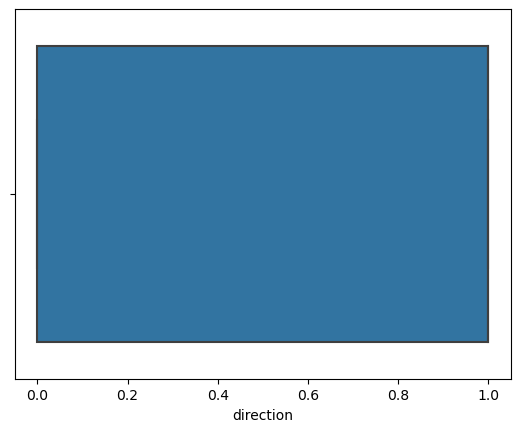

In [1186]:
# Mencari outliers dari kolom tapInStopsLat
sns.boxplot(data=df, x='direction');

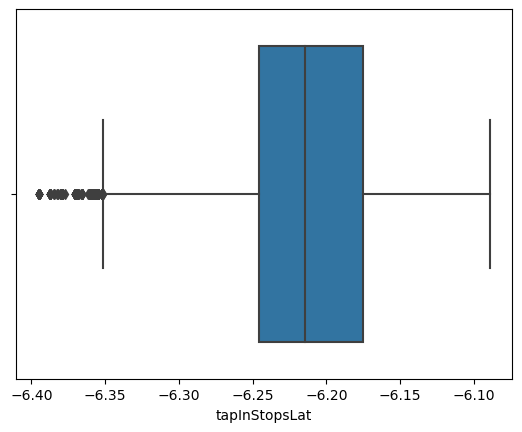

In [1187]:
# Mencari outliers dari kolom tapInStopsLat
sns.boxplot(data=df, x='tapInStopsLat');

In [1188]:
q1_tapInStopsLat = df['tapInStopsLat'].describe()['25%']
q3_tapInStopsLat = df['tapInStopsLat'].describe()['75%']

iqr_tapInStopsLat = q3_tapInStopsLat - q1_tapInStopsLat
iqr_tapInStopsLat

0.07033500000000004

In [1189]:
minimum_tapInStopsLat = q1_tapInStopsLat - (1.5 * iqr_tapInStopsLat)
minimum_tapInStopsLat

-6.3513655

In [1190]:
# Mencari outliers pada batas bawah minimum
len(df[df['tapInStopsLat']<minimum_tapInStopsLat][['tapInStopsLat']])

411

In [1191]:
# Jumlah outliers tapInStopsLat sebanyak 411
jumlah_outliers = 411
total_data = 37900

# Menghitung persentase outliers
persentase_outliers = (jumlah_outliers / total_data) * 100
print(f"Persentase outliers tapInStopsLat: {persentase_outliers:.2f}%")

Persentase outliers tapInStopsLat: 1.08%


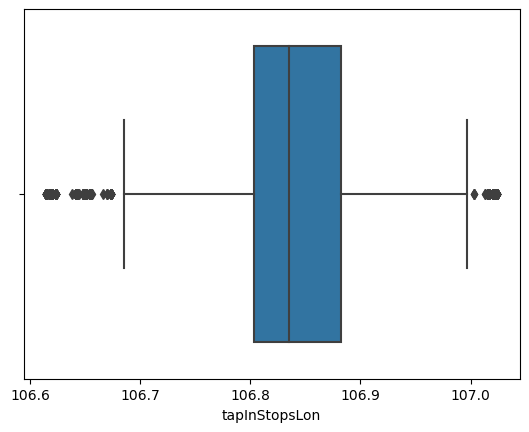

In [1192]:
# Mencari data outliers pada kolom tapInStopsLon
sns.boxplot(data=df, x='tapInStopsLon');

In [1193]:
q1_tapInStopsLon = df['tapInStopsLon'].describe()['25%']
q3_tapInStopsLon = df['tapInStopsLon'].describe()['75%']

iqr_tapInStopsLon = q3_tapInStopsLon - q1_tapInStopsLon
iqr_tapInStopsLon

0.07880000000000109

In [1194]:
minimum_tapInStopsLon = q1_tapInStopsLon - (1.5 * iqr_tapInStopsLon)
minimum_tapInStopsLon

106.68527

In [1195]:
maksimum_tapInStopsLon = q3_tapInStopsLon + (1.5 * iqr_tapInStopsLon)
maksimum_tapInStopsLon

107.00047

In [1196]:
# Mencari outliers pada batas bawah minimum
len(df[df['tapInStopsLon']<minimum_tapInStopsLon][['tapInStopsLon']])

355

In [1197]:
# Jumlah outliers bawah tapInStopsLon sebanyak 355
jumlah_outliers_bawah = 355
total_data = 37900

# Menghitung persentase outliers
persentase_outliers_bawah = (jumlah_outliers_bawah / total_data) * 100
print(f"Persentase outliers bawah tapInStopsLon: {persentase_outliers_bawah:.2f}%")

Persentase outliers bawah tapInStopsLon: 0.94%


In [1198]:
# Mencari outliers pada batas atas maksimum
len(df[df['tapInStopsLon']>maksimum_tapInStopsLon][['tapInStopsLon']])

203

In [1199]:
# Jumlah outliers atas tapInStopsLon sebanyak 203
jumlah_outliers_atas = 203
total_data = 37900

# Menghitung persentase outliers
persentase_outliers_atas = (jumlah_outliers_atas / total_data) * 100
print(f"Persentase outliers atas tapInStopsLon: {persentase_outliers_atas:.2f}%")

Persentase outliers atas tapInStopsLon: 0.54%


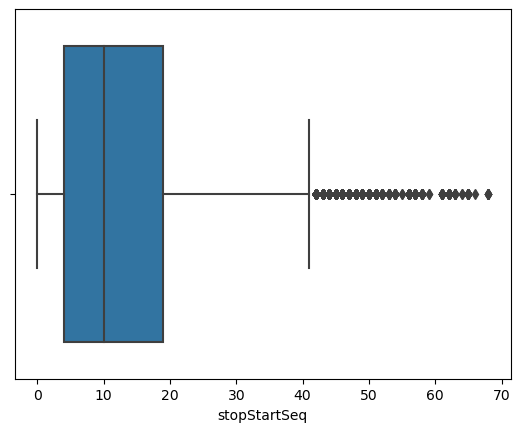

In [1200]:
# Mencari data outliers pada kolom stopStartSeq
sns.boxplot(data=df, x='stopStartSeq');

In [1201]:
q1_stopStartSeq = df['stopStartSeq'].describe()['25%']
q3_stopStartSeq = df['stopStartSeq'].describe()['75%']

iqr_stopStartSeq = q3_stopStartSeq - q1_stopStartSeq
iqr_stopStartSeq

15.0

In [1202]:
maksimum_stopStartSeq = q3_stopStartSeq + (1.5 * iqr_stopStartSeq)
maksimum_stopStartSeq

41.5

In [1203]:
# Mencari outliers pada batas atas maksimum
len(df[df['stopStartSeq']>maksimum_stopStartSeq][['stopStartSeq']])

1543

In [1204]:
# Jumlah outliers stopStartSeq sebanyak 1543
jumlah_outliers = 1543
total_data = 37900

# Menghitung persentase outliers
persentase_outliers = (jumlah_outliers / total_data) * 100
print(f"Persentase outliers stopStartSeq: {persentase_outliers:.2f}%")

Persentase outliers stopStartSeq: 4.07%


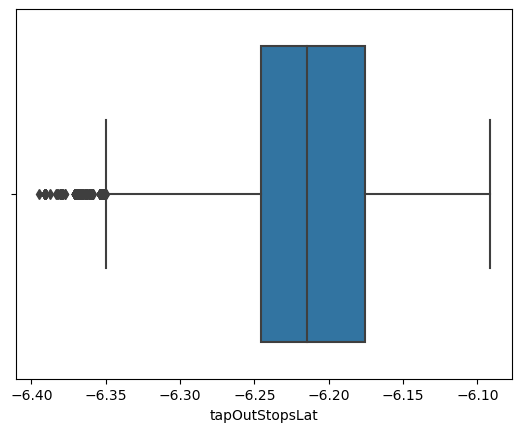

In [1205]:
# Mencari data outliers pada kolom tapOutStopsLat
sns.boxplot(data=df, x='tapOutStopsLat');

In [1206]:
q1_tapOutStopsLat = df['tapOutStopsLat'].describe()['25%']
q3_tapOutStopsLat = df['tapOutStopsLat'].describe()['75%']

iqr_tapOutStopsLat = q3_tapOutStopsLat - q1_tapOutStopsLat
iqr_tapOutStopsLat

0.06964100000000073

In [1207]:
minimum_tapOutStopsLat = q1_tapOutStopsLat - (1.5 * iqr_tapOutStopsLat)
minimum_tapOutStopsLat

-6.349901500000001

In [1208]:
# Mencari outliers pada batas bawah minimum
len(df[df['tapOutStopsLat']<minimum_tapOutStopsLat][['tapOutStopsLat']])

498

In [1209]:
# Jumlah outliers tapOutStopsLat sebanyak 498
jumlah_outliers = 498
total_data = 37900

# Menghitung persentase outliers
persentase_outliers = (jumlah_outliers / total_data) * 100
print(f"Persentase outliers tapOutStopsLat: {persentase_outliers:.2f}%")

Persentase outliers tapOutStopsLat: 1.31%


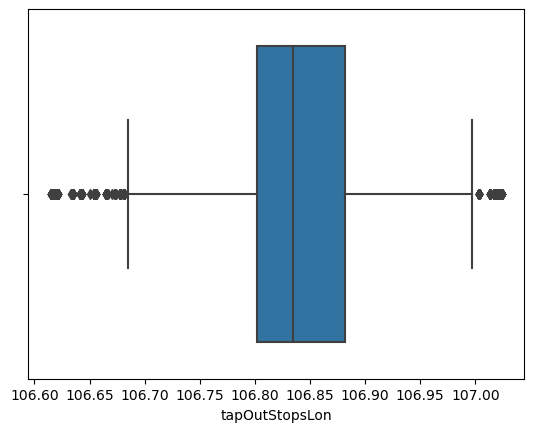

In [1210]:
# Mencari data outliers pada kolom tapOutStopsLon
sns.boxplot(data=df, x='tapOutStopsLon');

In [1211]:
q1_tapOutStopsLon = df['tapOutStopsLon'].describe()['25%']
q3_tapOutStopsLon = df['tapOutStopsLon'].describe()['75%']

iqr_tapOutStopsLon = q3_tapOutStopsLon - q1_tapOutStopsLon
iqr_tapOutStopsLon

0.08008999999999844

In [1212]:
minimum_tapOutStopsLon = q1_tapOutStopsLon - (1.5 * iqr_tapOutStopsLon)
minimum_tapOutStopsLon

106.681805

In [1213]:
maksimum_tapOutStopsLon = q3_tapOutStopsLon + (1.5 * iqr_tapOutStopsLon)
maksimum_tapOutStopsLon

107.00216499999999

In [1214]:
# Mencari outliers pada batas bawah minimum
len(df[df['tapOutStopsLon']<minimum_tapOutStopsLon][['tapOutStopsLon']])

315

In [1215]:
# Jumlah outliers bawah tapOutStopsLon sebanyak 315
jumlah_outliers_bawah = 315
total_data = 37900

# Menghitung persentase outliers
persentase_outliers_bawah = (jumlah_outliers_bawah / total_data) * 100
print(f"Persentase outliers bawah tapOutStopsLon: {persentase_outliers_bawah:.2f}%")

Persentase outliers bawah tapOutStopsLon: 0.83%


In [1216]:
# Mencari outliers pada batas atas maksimum
len(df[df['tapOutStopsLon']>maksimum_tapOutStopsLon][['tapOutStopsLon']])

246

In [1217]:
# Jumlah outliers atas tapOutStopsLon sebanyak 246
jumlah_outliers_atas = 246
total_data = 37900

# Menghitung persentase outliers
persentase_outliers_atas = (jumlah_outliers_atas / total_data) * 100
print(f"Persentase outliers atas tapOutStopsLon: {persentase_outliers_atas:.2f}%")

Persentase outliers atas tapOutStopsLon: 0.65%


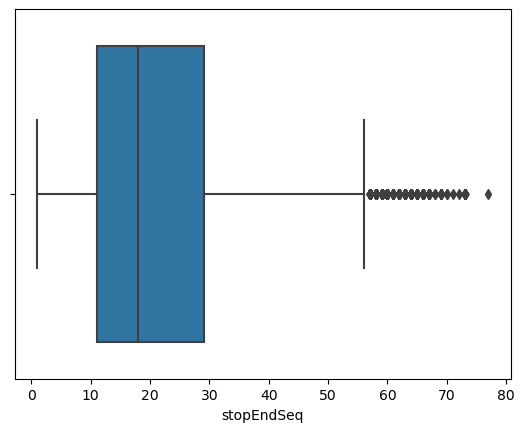

In [1218]:
# Mencari data outliers pada kolom stopEndSeq
sns.boxplot(data=df, x='stopEndSeq');

In [1219]:
q1_stopEndSeq = df['stopEndSeq'].describe()['25%']
q3_stopEndSeq = df['stopEndSeq'].describe()['75%']

iqr_stopEndSeq = q3_stopEndSeq - q1_stopEndSeq
iqr_stopEndSeq

18.0

In [1220]:
maksimum_stopEndSeq = q3_stopEndSeq + (1.5 * iqr_stopEndSeq)
maksimum_stopEndSeq

56.0

In [1221]:
# Mencari outliers pada batas atas maksimum
len(df[df['stopEndSeq']>maksimum_stopEndSeq][['stopEndSeq']])

583

In [1222]:
# Jumlah outliers stopEndSeq sebanyak 583
jumlah_outliers = 583
total_data = 37900

# Menghitung persentase outliers
persentase_outliers = (jumlah_outliers / total_data) * 100
print(f"Persentase outliers stopEndSeq: {persentase_outliers:.2f}%")

Persentase outliers stopEndSeq: 1.54%


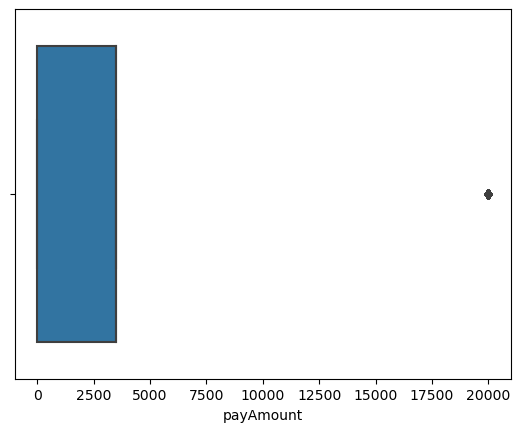

In [1223]:
# Mencari data outliers pada kolom payAmount
sns.boxplot(data=df, x='payAmount');

In [1224]:
q1_payAmount = df['payAmount'].describe()['25%']
q3_payAmount = df['payAmount'].describe()['75%']

iqr_payAmount = q3_payAmount - q1_payAmount
iqr_payAmount

3500.0

In [1225]:
maksimum_payAmount = q3_payAmount + (1.5 * iqr_payAmount)
maksimum_payAmount

8750.0

In [1226]:
# Mencari outliers pada batas atas maksimum
len(df[df['payAmount']>maksimum_payAmount][['payAmount']])

1742

In [1227]:
# Jumlah outliers payAmount sebanyak 1742
jumlah_outliers = 1742
total_data = 37900

# Menghitung persentase outliers
persentase_outliers = (jumlah_outliers / total_data) * 100
print(f"Persentase outliers payAmount: {persentase_outliers:.2f}%")

Persentase outliers payAmount: 4.60%


In [1228]:
# Ambil data yang bukan outliers
# Menghapus outliers karena rentang outliers terlalu jauh dari data aslinya
df = df[~(df['payAmount'] > 17500)]

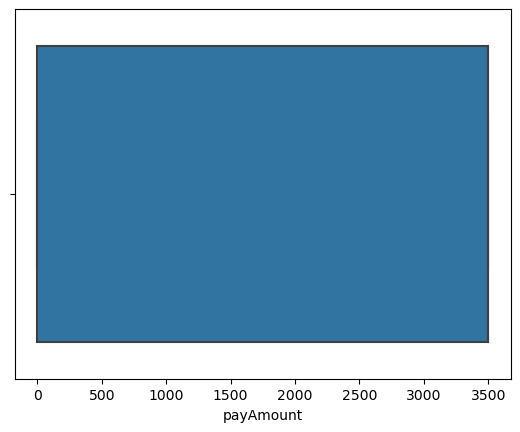

In [1229]:
# Mengecek data outliers pada kolom payAmount
sns.boxplot(data=df, x='payAmount');

**Insight:**

- Persentase outliers tapInStopsLat: 1.08%
- Persentase outliers bawah tapInStopsLon: 0.94% & persentase outliers atas tapInStopsLon: 0.54%
- Persentase outliers stopStartSeq: 4.07%
- Persentase outliers tapOutStopsLat: 1.31%
- Persentase outliers bawah tapOutStopsLon: 0.83% & persentase outliers atas tapOutStopsLon: 0.65%
- Persentase outliers stopEndSeq: 1.54%
- Persentase outliers payAmount: 4.60%

Dalam dataset yang diamati, terdapat beberapa variabel dengan presentase outliers yang berbeda. Mayoritas variabel menunjukkan presentase outliers yang relatif rendah, dengan angka di bawah 5%. Namun, terdapat satu variabel, yaitu **payAmount**, yang menonjol dengan presentase outliers sebesar **4.60%**.Penanganan outliers pada variabel payAmount perlu dilakukan karena presentase outliersnya mencapai 4.60%, yang menunjukkan keberadaan nilai-nilai yang jauh dari sebagian besar data lain dalam variabel tersebut. Sedangkan, variabel lainnya menunjukkan presentase outliers yang relatif rendah, sehingga tidak memerlukan penanganan khusus dan dapat dipertahankan dalam analisis tanpa perlu menghapus nilai-nilai ekstrem tersebut.

In [1230]:
# memastikan sudah tidak ada missing values
df.isna().sum()

transID             0
payCardID           0
payCardBank         0
payCardName         0
payCardSex          0
payCardBirthDate    0
corridorID          0
corridorName        0
direction           0
tapInStops          0
tapInStopsName      0
tapInStopsLat       0
tapInStopsLon       0
stopStartSeq        0
tapInTime           0
tapOutStops         0
tapOutStopsName     0
tapOutStopsLat      0
tapOutStopsLon      0
stopEndSeq          0
tapOutTime          0
payAmount           0
dtype: int64

### **d. Data formatting**

In [1231]:
# Mengubah type data kolom 'payCardID' dari int64 menjadi object
# ID tidak dimaksudkan untuk dioperasikan secara matematis, melainkan hanya sebagai label atau pengenal unik
df['payCardID'] = pd.to_numeric(df['payCardID']).astype(object)

In [1232]:
# Mengubah type data kolom 'direction' dari float64 menjadi int64
df['direction'] = df['direction'].astype(int)

In [1233]:
# Mengubah type data kolom 'tapInTime' dari object menjadi datetime
# tapInTime -> waktu tap in, mencakup tanggal dan jam
df['tapInTime'] = pd.to_datetime(df['tapInTime'])

In [1234]:
# Mengubah type data kolom 'stopEndSeq' dari float64 menjadi int64
df['stopEndSeq'] = df['stopEndSeq'].astype(int)

In [1235]:
# Mengubah type data kolom 'payamount' dari float64 menjadi int64
df['payAmount'] = df['payAmount'].astype(int)

In [1236]:
# mengecek kembali type data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36158 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           36158 non-null  object        
 1   payCardID         36158 non-null  object        
 2   payCardBank       36158 non-null  object        
 3   payCardName       36158 non-null  object        
 4   payCardSex        36158 non-null  object        
 5   payCardBirthDate  36158 non-null  int64         
 6   corridorID        36158 non-null  object        
 7   corridorName      36158 non-null  object        
 8   direction         36158 non-null  int64         
 9   tapInStops        36158 non-null  object        
 10  tapInStopsName    36158 non-null  object        
 11  tapInStopsLat     36158 non-null  float64       
 12  tapInStopsLon     36158 non-null  float64       
 13  stopStartSeq      36158 non-null  int64         
 14  tapInTime         36158 non

In [1237]:
df.to_csv('Transjakarta_cleaned.csv')

# **2. Exploratory Data Analysis (EDA)**

### **a. Summary Statistics**

*Ringkasan statistik deskriptif dari data numerik merujuk pada gambaran umum tentang distribusi data. Ini mencakup beberapa metrik seperti rata-rata, median, kuartil, rentang data, simpangan baku, serta nilai maksimum dan minimum dari setiap variabel numerik dalam dataset. Statistik deskriptif memberikan informasi penting tentang bagaimana data tersebar, seberapa jauh data terpisah dari nilai pusat, serta karakteristik-karakteristik inti lainnya yang membantu dalam memahami struktur dan sifat data.*

In [1238]:
df.describe()

,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
count,36158.000000,36158.000000,36158.000000,36158.000000,36158.000000,36158,36158.000000,36158.000000,36158.000000,36158,36158.000000
mean,1989.940926,0.500525,-6.213552,106.842824,13.964185,2023-04-16 08:07:40.668427264,-6.213128,106.842283,21.657697,2023-04-16 09:41:15.692156672,1888.517064
min,1946.000000,0.000000,-6.394973,106.614730,0.000000,2023-04-01 06:22:27,-6.394973,106.618070,1.000000,2023-04-01 07:27:31,0.000000
25%,1982.000000,0.000000,-6.245863,106.804410,4.000000,2023-04-10 09:10:16,-6.244978,106.803680,12.000000,2023-04-10 18:48:12.500000,0.000000
50%,1990.000000,1.000000,-6.213906,106.838660,11.000000,2023-04-16 17:38:48.500000,-6.214718,106.834580,18.000000,2023-04-16 19:03:14,3500.000000
75%,2000.000000,1.000000,-6.173925,106.883670,20.000000,2023-04-21 21:57:55,-6.174388,106.882160,29.000000,2023-04-21 19:48:41.249999872,3500.000000
max,2012.000000,1.000000,-6.089429,107.023950,68.000000,2023-04-30 21:55:41,-6.091746,107.023660,77.000000,2023-04-30 23:23:18,3500.000000
std,13.142602,0.500007,0.058107,0.060116,12.361296,NaN,0.057871,0.059031,13.611871,NaN,1744.533517


### **b. Correlation**

- *Korelasi hanya berlaku untuk dua data yang berupa angka. (X1 dan X2)*

- *Korelasi memiliki kriteria sebagai berikut:*
    - *Nilai mendekati 1 atau -1 menunjukkan keterkaitan yang sangat kuat antara kedua data angka.*
    - *Nilai mendekati 0 menunjukkan keterkaitan yang lemah antara kedua data angka.*
    - *Korelasi positif mengindikasikan bahwa jika nilai X1 meningkat, nilai X2 juga cenderung meningkat.*
    - *Korelasi negatif menandakan bahwa jika nilai X1 meningkat, nilai X2 cenderung menurun, menunjukkan hubungan yang berlawanan arah.*

In [1239]:
# Melihat tabel nilai korelasi antar data numerik
df.corr(numeric_only=True)

,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
payCardBirthDate,1.000000,0.002269,0.073873,-0.026755,-0.015608,0.051204,-0.027607,-0.017990,0.045312
direction,0.002269,1.000000,-0.000350,-0.008681,-0.048868,-0.043664,0.046524,-0.043883,0.000194
tapInStopsLat,0.073873,-0.000350,1.000000,0.009369,-0.021305,0.898408,0.014290,-0.036700,-0.079886
tapInStopsLon,-0.026755,-0.008681,0.009369,1.000000,0.028547,0.013956,0.897863,0.059578,-0.259036
stopStartSeq,-0.015608,-0.048868,-0.021305,0.028547,1.000000,-0.038537,0.020398,0.805944,-0.289395
tapOutStopsLat,0.051204,-0.043664,0.898408,0.013956,-0.038537,1.000000,0.004976,-0.053664,-0.073530
tapOutStopsLon,-0.027607,0.046524,0.014290,0.897863,0.020398,0.004976,1.000000,0.053998,-0.253137
stopEndSeq,-0.017990,-0.043883,-0.036700,0.059578,0.805944,-0.053664,0.053998,1.000000,-0.371197
payAmount,0.045312,0.000194,-0.079886,-0.259036,-0.289395,-0.073530,-0.253137,-0.371197,1.000000


In [1240]:
# triu --> upper triangle
matrix = np.triu(df.corr(numeric_only=True)) 

Text(0.5, 1.0, 'Correlation of Numeric Values')

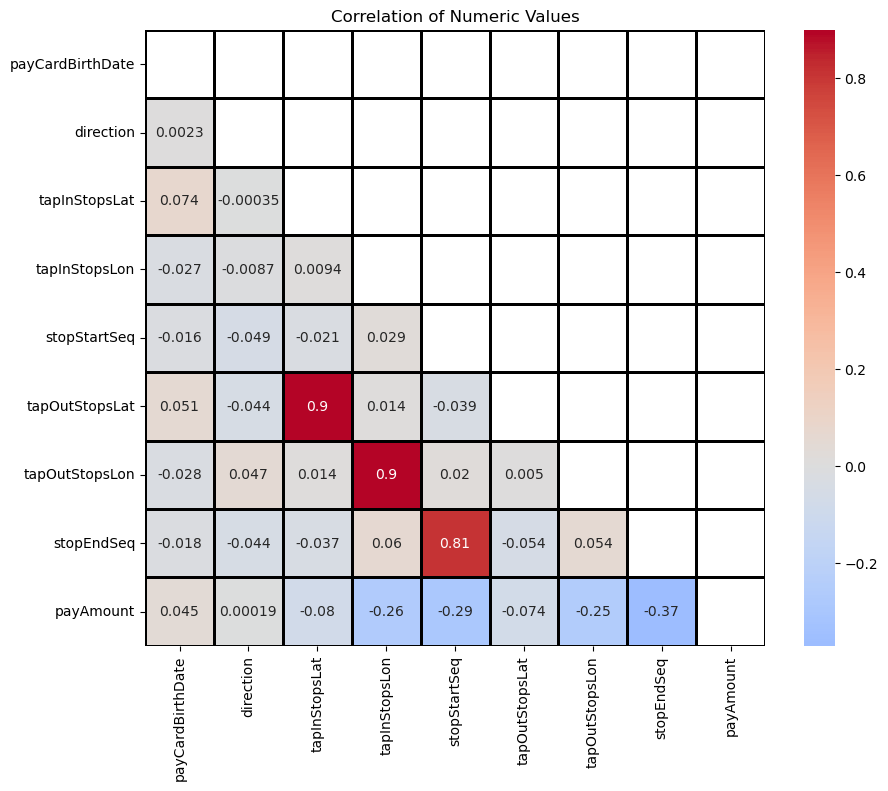

In [1241]:
plt.figure(figsize=(10, 8))

# Melihat korelasi dengan visualisasi heatmap
sns.heatmap(data=df.corr(numeric_only=True),
            annot=True,
            cmap= 'coolwarm',
            center = 0,
            mask=matrix,
            linecolor = 'black',
            linewidths = 1)

plt.title('Correlation of Numeric Values')

**Insight:**

Nilai korelasi yang tinggi seperti 0.9 antara **tapInStopsLat & tapOutStopsLat** atau antara **tapInStopsLon dan tapOutStopsLon**, menunjukkan adanya hubungan yang sangat kuat dan positif antara kedua pasangan variabel tersebut. Nilai ini menyiratkan bahwa perubahan dalam salah satu variabel (misalnya, tapInStopsLat) sangat erat terkait dengan perubahan dalam variabel lainnya (tapOutStopsLat). Dalam hal ini, korelasi 0.9 menandakan bahwa terdapat hubungan yang sangat mirip atau serupa antara nilai-nilai kedua pasangan variabel tersebut.

Korelasi tinggi tidak menyiratkan adanya hubungan sebab-akibat langsung antara variabel-variabel tersebut. Hal ini hanya menunjukkan adanya keterkaitan erat antara kedua variabel tersebut dalam data.

# **3. Data Visualisation**

In [1242]:
# Mengelompokkan jumlah pengguna berdasarkan gender (payCardSex)
df_N_Gender = df.groupby(by='payCardSex')[['payCardID']].count()
df_N_Gender

,payCardID
payCardSex,
F,19218
M,16940


In [1243]:
# Reset indeks 'df_N_Gender' setelah pengelompokan berdasarkan gender
df_N_Gender = df_N_Gender.reset_index()
df_N_Gender

,payCardSex,payCardID
0,F,19218
1,M,16940


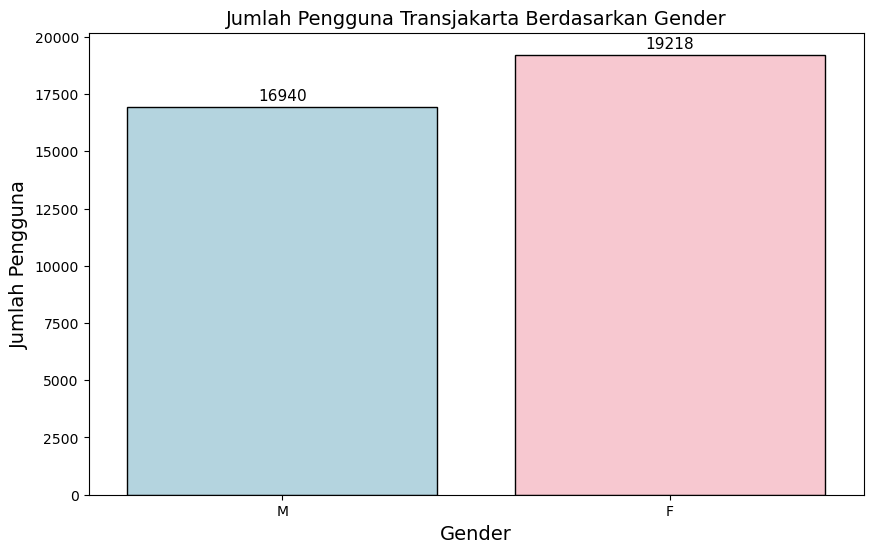

In [1244]:
# Mengatur ukuran grafik
plt.figure(figsize=(10,6))

# Mengatur palet warna untuk male dan female
colors = {'M': 'lightblue', 'F': 'pink'}

# Membuat histogram berdasarkan gender
plots = sns.countplot(data=df,                  # Menampilkan data
                      x='payCardSex',           # Sumbu horizontal (x-axis) dari plot akan mewakili kolom 'payCardSex' 
                      palette=colors,           # Palet warna untuk plot
                      edgecolor='black')        # Menentukan warna pinggiran (edge) dari batang pada plot 

# Menambahkan angka jumlah pengguna Transjakarta di atas setiap bar
for bar in plots.patches:
    plots.annotate(format(int((bar.get_height()))),             
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',            
                    size=11, xytext=(0, 8),
                    textcoords='offset points')
    
# Menambahkan judul dan label sb.x dan sb.y pada diagram
plt.title('Jumlah Pengguna Transjakarta Berdasarkan Gender', fontsize=14)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Jumlah Pengguna', fontsize=14)

# Menampilkan plot
plt.show()

In [1245]:
# Menghitung total jumlah pengguna layanan Transjakarta setelah pengelompokan berdasarkan gender
total = df_N_Gender['payCardID'].sum()
total

36158

In [1246]:
# Menghitung persentase pengguna berdasarkan gender dari total jumlah pengguna
df_N_Gender['gender_percentage'] = (df_N_Gender['payCardID'] / total) * 100
df_N_Gender

,payCardSex,payCardID,gender_percentage
0,F,19218,53.150064
1,M,16940,46.849936


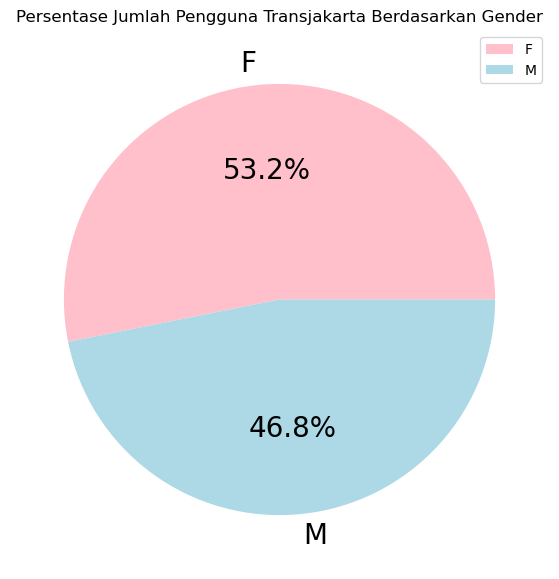

In [1247]:
# Mengatur ukuran grafik
plt.figure(figsize=(14,7))

# Membuat pie chart dengan data pengguna berdasarkan gender
plt.pie(x = df_N_Gender['payCardID'],                       # Menampilkan data
        labels=df_N_Gender['payCardSex'],                   # Menampilkan label untuk setiap kategori
        autopct='%.1f%%',                                   # Menambahkan nilai persentase                     
        textprops={'fontsize': 20, 'color': 'black'},       # Menentukan ukuran font angka persentase                     
        colors=['pink', 'lightblue'])                       # Memberikan warna pada bagian diagram

# Menambahkan judul pada diagram
plt.title('Persentase Jumlah Pengguna Transjakarta Berdasarkan Gender')

# Menambahkan legend keterangan tiap gender
plt.legend(df_N_Gender['payCardSex'])

# Menampilkan pie chart
plt.show()

**Insight:**

Secara keseluruhan, jumlah pengguna Transjakarta perempuan mencapai sekitar 19.218 orang (53.2%), sedangkan  laki-laki berjumlah 16.940 orang (46.8%). Data menunjukkan ada kecenderungan pertumbuhan pengguna perempuan yang cukup signifikan dalam penggunaan layanan Transjakarta. Hal ini bisa menjadi peluang bagi Transjakarta untuk lebih menyesuaikan layanan mereka dengan kebutuhan dan preferensi yang mungkin lebih mendominasi pada pengguna perempuan.

**Saran:**

- **Peningkatan keamanan dan kenyamanan di halte yang ramah perempuan**: Berfokus pada meningkatkan keamanan dan kenyamanan di halte-halte yang sering digunakan oleh penumpang perempuan. Langkah-langkah ini bisa termasuk peningkatan keamanan dengan penambahan petugas keamanan, pengoptimalan pencahayaan di halte-halte dan peningkatan kontrol keamanan di sekitar area-area tersebut. 

- **Toilet umum yang bersih dan mudah diakses**: Penyediaan toilet umum yang bersih dan terawat dengan baik, khusus untuk pengguna perempuan. Lokasi toilet umum ini bisa ditempatkan di halte-halte utama yang banyak digunakan oleh penumpang perempuan.

- **Diskon atau promo khusus untuk penumpang perempuan**: Memberikan diskon khusus atau promo pada hari-hari spesial seperti Hari Kartini atau Hari Ibu adalah cara yang baik untuk menghormati perayaan yang penting bagi perempuan sambil memberikan insentif menarik agar mereka menggunakan layanan transportasi Transjakarta.

- **Konsultasi dan partisipasi komunitas**: Melibatkan komunitas perempuan dalam proses perencanaan atau evaluasi layanan transportasi, memungkinkan mereka untuk berbagi perspektif dan kebutuhan mereka.

In [1248]:
# Mengidentifikasi nilai-nilai unik (tanggal lahir) dalam kolom 'payCardBirthDate'
df['payCardBirthDate'].unique()

array([2008, 1997, 1992, 1978, 1982, 1974, 1991, 2004, 1984, 1988, 2002,
       1975, 2011, 2003, 1981, 2009, 1983, 1999, 2007, 1979, 1960, 1995,
       2001, 1990, 1968, 1985, 2010, 1989, 2006, 1986, 1965, 2005, 1993,
       1966, 1994, 1972, 1969, 1970, 2000, 1953, 1977, 2012, 1987, 1996,
       1971, 1956, 1980, 1998, 1973, 1946, 1976, 1959, 1967, 1951, 1957,
       1948, 1961, 1964, 1962, 1949, 1954, 1947, 1952, 1963, 1958, 1955,
       1950])

In [1249]:
# Menghitung jumlah kemunculan setiap tahun kelahiran dalam kolom 'payCardBirthDate' 
tahun_lahir = df[['payCardBirthDate']].value_counts().head()
tahun_lahir

payCardBirthDate
1994                1312
1981                1294
1992                1269
1987                1210
1984                1175
Name: count, dtype: int64

In [1250]:
# Daftar tahun kelahiran
tahun_lahir = [1994, 1981, 1992, 1987, 1984]

# Tahun sekarang
tahun_sekarang = 2023

# Menghitung umur berdasarkan tahun kelahiran pada tahun sekarang
umur_sekarang = [tahun_sekarang - tahun for tahun in tahun_lahir]

# Menampilkan hasil
for tahun, umur in zip(tahun_lahir, umur_sekarang):
    print(f"Tahun lahir: {tahun}, Umur sekarang: {umur}")

Tahun lahir: 1994, Umur sekarang: 29
Tahun lahir: 1981, Umur sekarang: 42
Tahun lahir: 1992, Umur sekarang: 31
Tahun lahir: 1987, Umur sekarang: 36
Tahun lahir: 1984, Umur sekarang: 39


In [1251]:
# Menghitung usia pengguna Transjakarta berdasarkan tahun lahir (payCardBirthDate)
current_year = 2023                                   # Mengasumsikan tahun saat ini
df['Age'] = current_year - df['payCardBirthDate']     # Membuat kolom baru untuk usia

In [1252]:
# Nilai minimum dari kolom 'Age'
min(df['Age'])

11

In [1253]:
# Nilai maksimum dari kolom 'Age'
max(df['Age'])

77

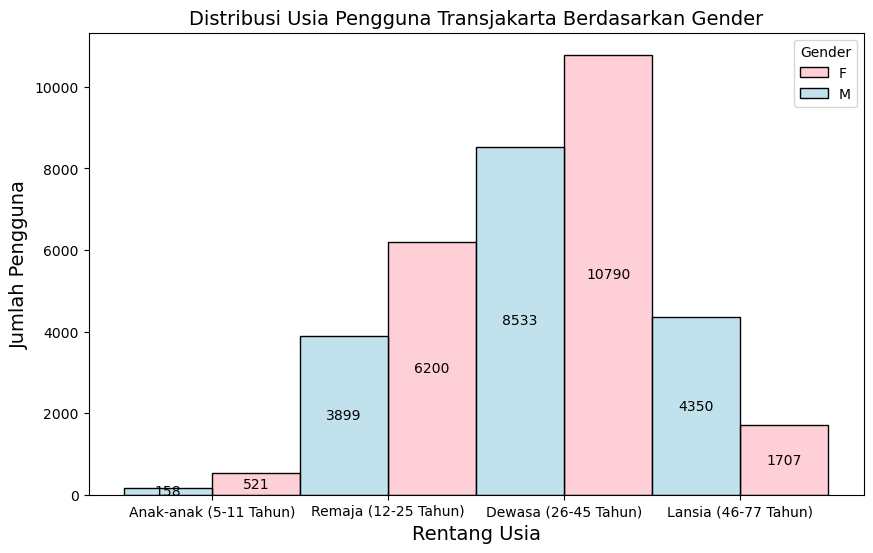

In [1254]:
# Mengatur warna untuk male dan female
colors = {'M': 'lightblue', 'F': 'pink'}

# Menentukan batasan usia untuk kategori dan labelnya
bins = [5, 12, 26, 46, 78]
labels = ['Anak-anak (5-11 Tahun)', 'Remaja (12-25 Tahun)', 'Dewasa (26-45 Tahun)', 'Lansia (46-77 Tahun)']

# Membuat kolom baru 'AgeGroup' dengan usia yang sudah dikategorikan
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels,right=False)
# pd.cut() untuk mengkategorikan data numerik menjadi beberapa interval berdasarkan batas-batas yang telah ditentukan sebelumnya

# Menyesuaikan kategori usia sesuai dengan yang diinginkan
df['AgeGroup'] = pd.Categorical(df['AgeGroup'], categories=labels, ordered=True)
# ordered=True mengindikasikan bahwa kategori-kategori tersebut memiliki urutan

# Mengatur ukuran grafik
plt.figure(figsize=(10,6))

# Membuat histogram berdasarkan gender dan kategori usia
plot = sns.histplot(data=df,
                    x='AgeGroup',
                    hue='payCardSex',
                    multiple='dodge',    # dodge mengatur histogram menjadi berdampingan
                    palette=colors,
                    edgecolor='black')

# Menambahkan judul dan label sb.x dan sb.y pada diagram
plt.title('Distribusi Usia Pengguna Transjakarta Berdasarkan Gender', fontsize=14)
plt.xlabel('Rentang Usia', fontsize=14)
plt.ylabel('Jumlah Pengguna', fontsize=14)

# Menambahkan angka jumlah penumpang di atas setiap bar
for bar in plot.containers:
    plot.bar_label(bar,label_type='center')

# Menambahkan legend keterangan tiap gender
plt.legend(df['payCardSex'])

# Menyesuaikan layout agar tata letak diagram terlihat rapi
plt.legend(title='Gender',labels=['F', 'M'])

# Menampilkan histogram
plt.show()

**Insight:**

Mayoritas pengguna layanan Transjakarta yang merupakan orang dewasa, terutama di rentang usia 26 hingga 45 tahun, bisa dipengaruhi oleh beberapa faktor:
- Aktivitas harian: Rentang usia ini seringkali merupakan masa di mana orang aktif dalam pekerjaan dan tanggung jawab keluarga. Penggunaan Transjakarta sebagai transportasi sehari-hari untuk pergi bekerja, mengantar anak sekolah atau beraktivitas sehari-hari mungkin menjadi pilihan yang nyaman dan efisien.

- Keterjangkauan harga: Bagi mereka yang berusia di rentang ini, Transjakarta bisa dianggap sebagai pilihan yang lebih terjangkau dan efisien dari segi biaya daripada menggunakan transportasi pribadi atau ojek daring.

**Saran:**

- **Penyesuaian jadwal dan rute yang lebih akomodatif**: Sebagian besar pengguna Transjakarta adalah orang dewasa di rentang usia 26 hingga 45 tahun. Dengan demikian, penyesuaian jadwal layanan atau rute bisa dioptimalkan untuk mengakomodasi jam kerja atau aktivitas rutin mereka. Sebagai contoh, menyesuaikan jadwal layanan di pagi dan sore hari untuk menyesuaikan dengan jam kerja yang umumnya dimiliki oleh kelompok usia ini.

- **Fasilitas yang mengakomodasi kebutuhan orang dewasa**: Memahami preferensi orang dewasa dalam hal kenyamanan dan kebutuhan praktis, seperti menyediakan tempat duduk yang nyaman dan area tunggu yang tenang. Misalnya, menyediakan ruang istirahat dengan fasilitas pengisian daya ponsel di beberapa halte yang sering digunakan oleh kelompok usia ini.

- **Program promosi yang tepat sasaran**: Melakukan promosi yang lebih terfokus untuk kelompok usia ini. Contohnya adalah program loyalitas yang memberikan insentif bagi mereka yang sering menggunakan layanan Transjakarta, seperti diskon khusus.

- **Informasi yang jelas dan mudah diakses**: Menyediakan informasi terperinci tentang layanan Transjakarta, seperti estimasi waktu tunggu atau pembaruan rute, baik melalui aplikasi, situs web atau papan informasi di halte-halte yang ramai digunakan oleh kelompok usia ini.

In [1255]:
# Mengidentifikasi nilai-nilai unik (nama bank) dalam kolom 'payCardBank'
df['payCardBank'].unique()

array(['emoney', 'dki', 'flazz', 'online', 'brizzi', 'bni'], dtype=object)

In [1256]:
# Menghitung frekuensi masing-masing nilai yang terdapat dalam kolom 'payCardBank'
bank_counts = df['payCardBank'].value_counts()
bank_counts

payCardBank
dki       18045
emoney     6453
brizzi     3238
flazz      3114
online     2742
bni        2566
Name: count, dtype: int64

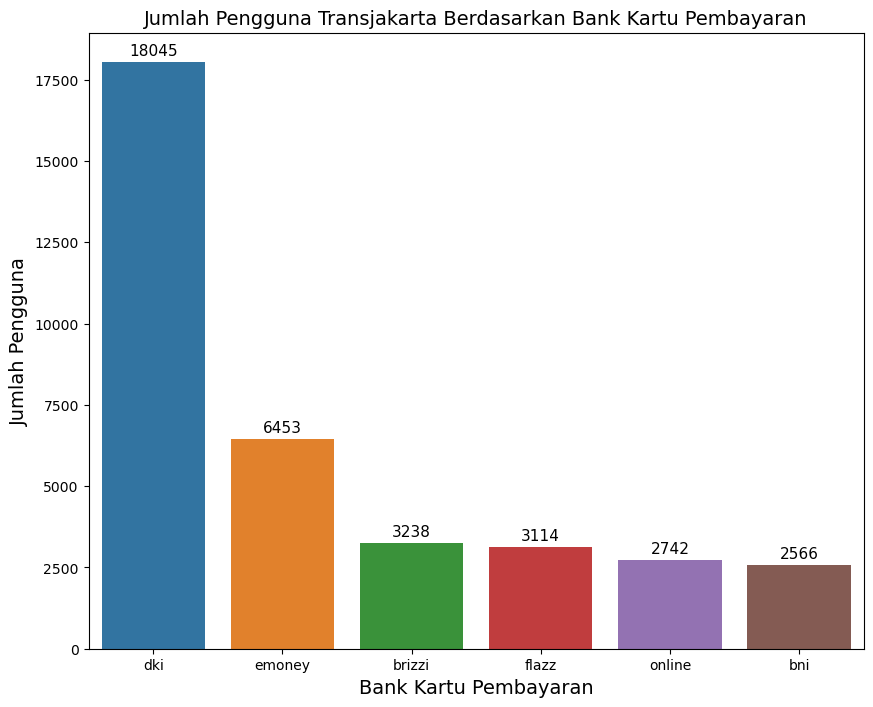

In [1257]:
# Mengatur ukuran grafik
plt.figure(figsize=(10,8))

# Membuat barplot
plot = sns.barplot(x=bank_counts.index,
                   y=bank_counts.values)

# Menambahkan jumlah pengguna di atas setiap bar
for bar in plot.patches:
    plot.annotate(format(int((bar.get_height()))),
                  (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size=11, xytext=(0, 8),
                   textcoords='offset points')

# Menambahkan judul dan label sb.x dan sb.y pada diagram
plt.title('Jumlah Pengguna Transjakarta Berdasarkan Bank Kartu Pembayaran', fontsize=14)
plt.xlabel('Bank Kartu Pembayaran', fontsize=14)
plt.ylabel('Jumlah Pengguna', fontsize=14)

# Menampilkan plot
plt.show()

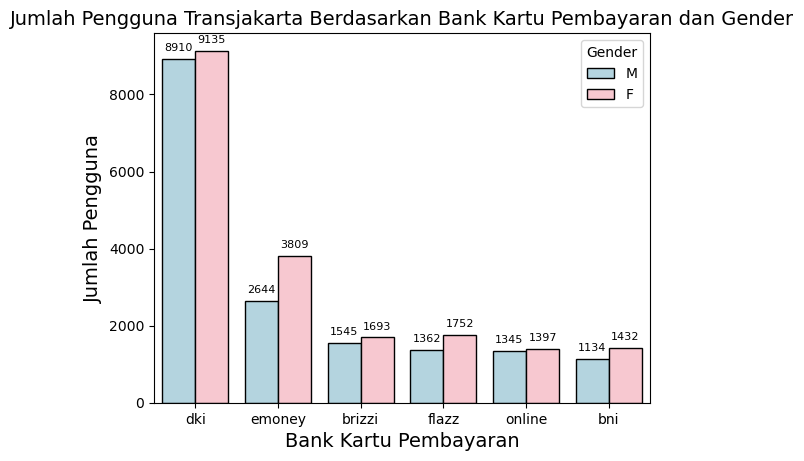

In [1258]:
# Mengurutkan kategori payCardBank secara descending
payCardBank_order = df['payCardBank'].value_counts().index

# Mengatur warna untuk male dan female
colors = {'M': 'lightblue', 'F': 'pink'}

# Membuat count plot 
plots = sns.countplot(data=df, 
                      x='payCardBank', 
                      hue='payCardSex', 
                      order=payCardBank_order,
                      palette=colors,
                      edgecolor='black')

# Menambahkan jumlah pengguna di atas setiap bar
for bar in plots.patches:
    plots.annotate(format(int((bar.get_height()))),             
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',                
                   size=8, xytext=(0, 8),
                   textcoords='offset points')
    
# Menambahkan judul dan label sb.x dan sb.y pada diagram
plt.title('Jumlah Pengguna Transjakarta Berdasarkan Bank Kartu Pembayaran dan Gender', fontsize=14)
plt.xlabel('Bank Kartu Pembayaran', fontsize=14)
plt.ylabel('Jumlah Pengguna', fontsize=14)

# Menyesuaikan layout agar tata letak diagram terlihat rapi
plt.legend(title='Gender',labels=['M', 'F'])

# Menampilkan plot
plt.show()

**Insight:**

- Bank DKI merupakan bank pilihan penumpang pria dan wanita paling tertinggi untuk pembayaran layanan Transjakarta.

- Distribusi bank relatif merata antar gender dengan “DKI”,  “Emoney”, “Brizzi”, “Flazz”, “Online” dan "BNI" menjadi pilihan populer bagi keduanya.

**Saran :**
- **Optimalkan kemitraan dengan Bank DKI**: Dengan penggunaan yang tinggi dari kartu Bank DKI, menjalin kemitraan yang lebih erat dengan bank ini dapat menjadi langkah strategis. Ini bisa termasuk peningkatan integrasi layanan atau pengembangan program insentif khusus bagi pengguna kartu Bank DKI untuk menarik lebih banyak pengguna yang menggunakan bank tersebut.
    - Diskon atau potongan harga: Pengguna kartu Bank DKI bisa mendapatkan diskon tambahan atau potongan harga khusus saat melakukan pembayaran tiket Transjakarta.

    - Cashback atau pengembalian dana: Setiap transaksi menggunakan kartu Bank DKI di layanan Transjakarta memberikan cashback atau pengembalian dana dalam bentuk kredit yang dapat digunakan untuk transaksi berikutnya.

    - Program poin atau loyalti: Setiap transaksi menggunakan kartu Bank DKI memberikan poin yang dapat ditukarkan dengan hadiah atau diskon khusus, seperti tiket gratis atau keuntungan lainnya pada transaksi selanjutnya.

    - Hadiah undian: Pengguna kartu Bank DKI yang aktif melakukan transaksi di Transjakarta bisa dimasukkan ke dalam undian dengan hadiah menarik, seperti voucher belanja, perjalanan gratis atau barang lainnya.

- **Analisis penggunaan bank lain**: Meskipun bank DKI mendominasi jumlah transaksi, memeriksa penggunaan bank lain dan memahami mengapa pengguna lebih memilih bank tertentu dalam melakukan transaksi bisa memberikan wawasan tambahan. Ini bisa membantu dalam mengevaluasi potensi kemitraan atau strategi pemasaran yang lebih efektif dengan bank-bank lain.

In [1259]:
df[['tapInTime']].min()

tapInTime   2023-04-01 06:22:27
dtype: datetime64[ns]

In [1260]:
df[['tapInTime']].max()

tapInTime   2023-04-30 21:55:41
dtype: datetime64[ns]

**Data Transjakarta hanya 1 bulan saja pada Bulan April (2023-04-1) sampai (2023-04-30)**

In [1261]:
# Mendapatkan informasi dari kolom tapInTime
tap_in_time = df['tapInTime'].dt.strftime('%H:%M:%S')
tap_in_time

0        05:21:44
1        05:42:44
2        05:59:06
3        05:44:51
4        06:17:35
           ...   
37894    11:36:12
37895    18:18:37
37896    21:52:31
37898    19:59:26
37899    21:08:12
Name: tapInTime, Length: 36158, dtype: object

In [1262]:
# Mendapatkan informasi jam dari kolom tapInTime
tap_in_hours = df['tapInTime'].dt.hour
tap_in_hours

0         5
1         5
2         5
3         5
4         6
         ..
37894    11
37895    18
37896    21
37898    19
37899    21
Name: tapInTime, Length: 36158, dtype: int32

In [1263]:
# Mendapatkan informasi dari kolom tapInTime
tap_out_time = df['tapOutTime'].dt.strftime('%H:%M:%S')
tap_out_time

0        06:00:53
1        06:40:01
2        06:50:55
3        06:28:16
4        06:57:03
           ...   
37894    13:15:25
37895    19:55:49
37896    22:28:22
37898    20:27:50
37899    21:34:53
Name: tapOutTime, Length: 36158, dtype: object

In [1264]:
# Mendapatkan informasi jam dari kolom tapInTime
tap_out_hours = df['tapOutTime'].dt.hour
tap_out_hours

0         6
1         6
2         6
3         6
4         6
         ..
37894    13
37895    19
37896    22
37898    20
37899    21
Name: tapOutTime, Length: 36158, dtype: int32

In [1265]:
df['Time'] = df.apply(lambda row: pd.Series([row['tapInTime'], row['tapOutTime']]), axis=1).stack().reset_index(drop=True)
df['Time']

0       2023-04-03 05:21:44
1       2023-04-03 06:00:53
2       2023-04-03 05:42:44
3       2023-04-03 06:40:01
4       2023-04-03 05:59:06
                ...        
37894   2023-04-12 21:11:27
37895   2023-04-12 22:29:09
37896   2023-04-12 18:06:50
37898   2023-04-12 19:59:52
37899   2023-04-12 21:26:19
Name: Time, Length: 36158, dtype: datetime64[ns]

In [1266]:
# Menghitung jumlah penumpang Tap In pada setiap jam
passenger_count = tap_in_hours.value_counts().sort_index()
passenger_count

tapInTime
5     3268
6     5607
7     2654
8     2704
9     2638
10     288
11     330
12     319
13     337
14     172
15     392
16    3280
17    5250
18    2315
19    2309
20    2270
21    2025
Name: count, dtype: int64

In [1267]:
# Menghitung jumlah penumpang Tap Out pada setiap jam
passenger_count2 = tap_out_hours.value_counts().sort_index()
passenger_count2

tapOutTime
0        1
5      985
6     3347
7     3754
8     2590
9     2552
10    2310
11     975
12     311
13     322
14     294
15     212
16     319
17    2021
18    4198
19    4733
20    2224
21    2197
22    1983
23     830
Name: count, dtype: int64

**Line Plot**
- *Menampilkan trend atau progres dalam rentang waktu tertentu.*

- *Menggunakan data timeseries (variable yang berkaitan dengan waktu).*

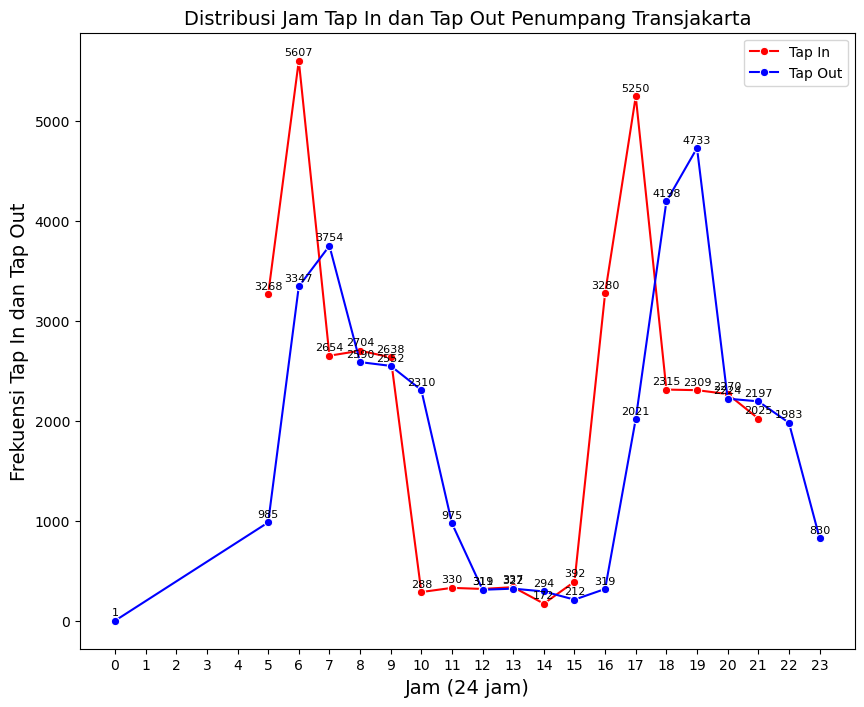

In [1268]:
# Mengatur ukuran grafik
plt.figure(figsize=(10, 8))

# Membuat line plot untuk distribusi jam Tap In
sns.lineplot(x=passenger_count.index,
             y=passenger_count.values,
             marker='o',
             color='red',
             label='Tap In')

# Membuat line plot untuk distribusi jam Tap Out
sns.lineplot(x=passenger_count2.index,
             y=passenger_count2.values,
             marker='o',
             color='blue',
             label='Tap Out')

# Menambahkan judul dan label sb.x dan sb.y pada diagram
plt.title('Distribusi Jam Tap In dan Tap Out Penumpang Transjakarta', fontsize=14)
plt.xlabel('Jam (24 jam)', fontsize=14)
plt.ylabel('Frekuensi Tap In dan Tap Out', fontsize=14)

# Mengatur label sumbu x dari 0 hingga 23 (24 jam dalam sehari)
plt.xticks(range(24))

# Menambahkan jumlah penumpang di atas setiap bar untuk Tap In
for i, count in enumerate(passenger_count.values):
    plt.text(passenger_count.index[i], count + 50, str(count), ha='center', fontsize=8)

# Menambahkan jumlah penumpang di atas setiap bar untuk Tap Out
for i, count in enumerate(passenger_count2.values):
    plt.text(passenger_count2.index[i], count + 50, str(count), ha='center', fontsize=8)

# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.show()

**Insight:**

- *Pada jam 05.00 - 09.00 merupakan jam sibuk (peak hours) pertama.*

- **Waktu berangkat kerja atau sekolah**: jam 05.00 - 09.00 adalah waktu yang umum bagi orang untuk berangkat bekerja atau sekolah. Banyak orang yang menggunakan layanan Transjakarta sebagai sarana transportasi menuju tempat kerja atau sekolah pada waktu ini.

- *Pada jam 17.00 - 21.00 merupakan jam sibuk (peak hours) kedua.*

- **Pulang kerja atau sekolah**: pada jam 17.00 - 21.00, banyak orang sudah menyelesaikan pekerjaan atau kegiatan sekolah mereka, sehingga kembali menggunakan layanan Transjakarta untuk pulang ke rumah.

**Saran :**
- **Penjadwalan layanan yang lebih optimal**: Transjakarta memiliki peluang untuk menyempurnakan jadwal layanan dan alokasi armadanya agar lebih sesuai dengan permintaan. Dengan meningkatkan jadwal layanan dan jumlah armada pada jam-jam sibuk untuk memenuhi permintaan yang tinggi dengan lebih baik.

- **Peningkatan pengalaman pengguna**: Dengan fokus lebih pada jam-jam yang paling ramai, Transjakarta dapat meningkatkan pengalaman pengguna pada saat-saat tersebut. Dengan menyediakan petugas tambahan di halte-halte terpadat untuk membantu mengatur antrian, memberikan informasi tentang jadwal bus yang lebih akurat, serta menyediakan fasilitas penunjang seperti tempat duduk yang lebih banyak atau area tunggu yang lebih nyaman selama jam sibuk.

In [1269]:
# Menghitung jumlah pengguna pada setiap harinya dalam sebulan
daily_count = df['tapInTime'].dt.dayofweek.value_counts().sort_index()

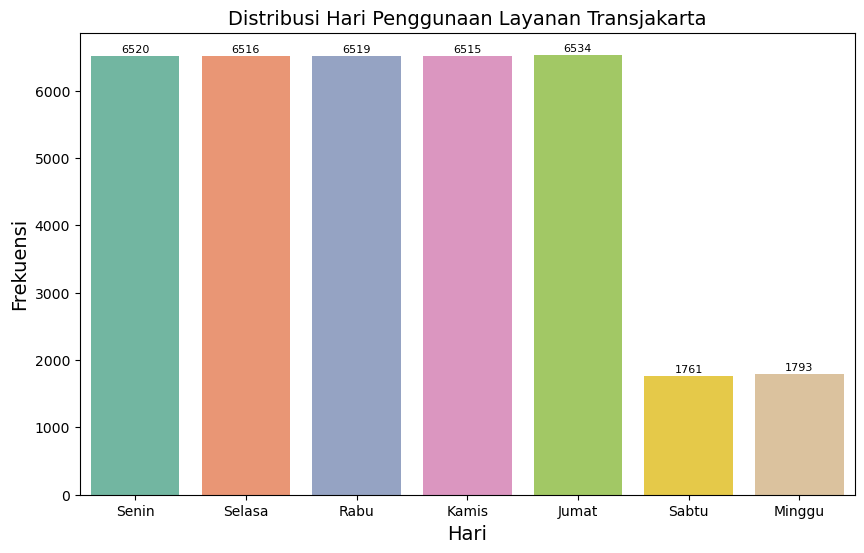

In [1270]:
# Mengatur ukuran grafik
plt.figure(figsize=(10, 6))

# Membuat bar plot untuk distribusi penggunaan Transjakarta setiap harinyA dalam sebulan
sns.barplot(x=daily_count.index,
            y=daily_count.values,
            palette='Set2')

# Menambahkan judul dan label sb.x dan sb.y pada diagram
plt.title('Distribusi Hari Penggunaan Layanan Transjakarta', fontsize = 14)
plt.xlabel('Hari', fontsize = 14)
plt.ylabel('Frekuensi', fontsize = 14)

# Mengatur label sumbu x dari Senin hingga Minggu (0 hingga 6)
plt.xticks(range(7), ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu'])

# Menambahkan jumlah penggunaan di atas setiap bar
for i, count in enumerate(daily_count.values):
    plt.text(daily_count.index[i], count + 50, str(count), ha='center', fontsize=8)

# Menampilkan plot
plt.show()

**Insight:**

Pada hari kerja terutama Senin dan Jumat, terjadi peningkatan penggunaan layanan Transjakarta yang signifikan. Ini kemungkinan besar terkait dengan rutinitas pekerjaan masyarakat yang menggunakan transportasi umum untuk pergi ke kantor. Fenomena ini menunjukkan bahwa permintaan layanan transportasi publik sangat tinggi pada hari-hari tersebut karena aktivitas sehari-hari masyarakat yang terikat dengan rutinitas kerja.

Di sisi lain, pada akhir pekan, terlihat penurunan penggunaan layanan Transjakarta. Hal ini mengindikasikan adanya penurunan jumlah kunjungan atau aktivitas pada hari sabtu dan minggu. Biasanya pada akhir pekan, orang-orang memilih untuk beristirahat di rumah, pergi ke tempat-tempat yang tidak terlalu jauh atau menggunakan transportasi pribadi untuk keperluan liburan atau kegiatan keluarga.

**Saran :**
- **Optimalkan Layanan pada Hari Kerja**: Dengan lonjakan penggunaan pada hari senin sampai jumat, Transjakarta bisa lebih fokus pada pengaturan layanan ekstra atau peningkatan frekuensi armada di hari-hari tersebut. Hal ini membantu menyesuaikan layanan dengan kebutuhan pengguna yang lebih tinggi saat mereka pergi dan pulang dari kantor.

- **Penawaran Khusus di Akhir Pekan**: Mengingat penggunaan yang lebih rendah pada akhir pekan, Transjakarta bisa merancang program promosi atau penawaran khusus untuk menarik lebih banyak penumpang. Ini bisa berupa diskon tiket atau program lainnya yang membuat layanan mereka lebih menarik di hari-hari yang cenderung sepi tersebut.

In [1271]:
# Mengidentifikasi nilai-nilai unik (nama halte) dalam kolom 'tapInStopsName'
df['tapInStopsName'].unique()

array(['Pal Putih', 'Kemenkes 2', 'Gg. Kunir II', ..., 'AKR Tower',
       'Jln. Kartika Meruya Selatan', 'Jln. Gunung Galunggung 1'],
      dtype=object)

In [1272]:
# Menghitung frekuensi yang sering muncul untuk melakukan Tap In (masuk) pada setiap halte (tapInStopsName)
tap_in_stops = df['tapInStopsName'].value_counts().head(10)
tap_in_stops

tapInStopsName
Penjaringan          243
Garuda Taman Mini    208
BKN                  173
BNN LRT              155
Pejaten              152
Rusun Kapuk Muara    131
Penggilingan         130
Tendean              126
Seskoal              126
Petojo               119
Name: count, dtype: int64

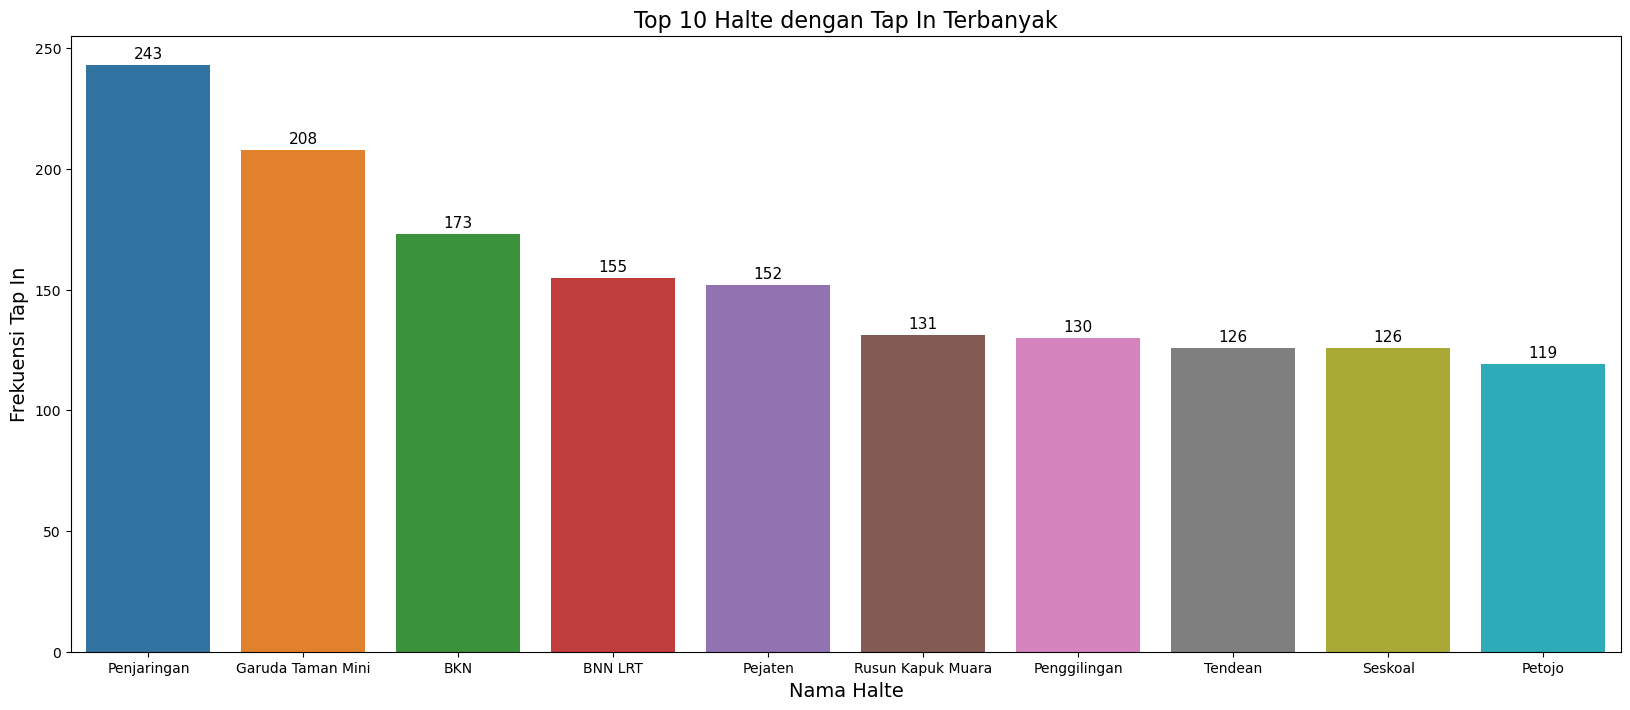

In [1273]:
# Mengatur ukuran grafik
plt.figure(figsize=(20,8))

# Membuat barplot
plots = sns.barplot(x=tap_in_stops.index,
                    y=tap_in_stops.values)

# Menambahkan jumlah kunjungan di atas setiap bar
for bar in plots.patches:
    plots.annotate(format(int((bar.get_height()))),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                    size=11, xytext=(0, 8),
                    textcoords='offset points')

# Menambahkan judul dan label sb.x dan sb.y pada diagram
plt.title('Top 10 Halte dengan Tap In Terbanyak', fontsize = 16)
plt.xlabel('Nama Halte', fontsize = 14)
plt.ylabel('Frekuensi Tap In', fontsize = 14)

# Menampilkan plot
plt.show()

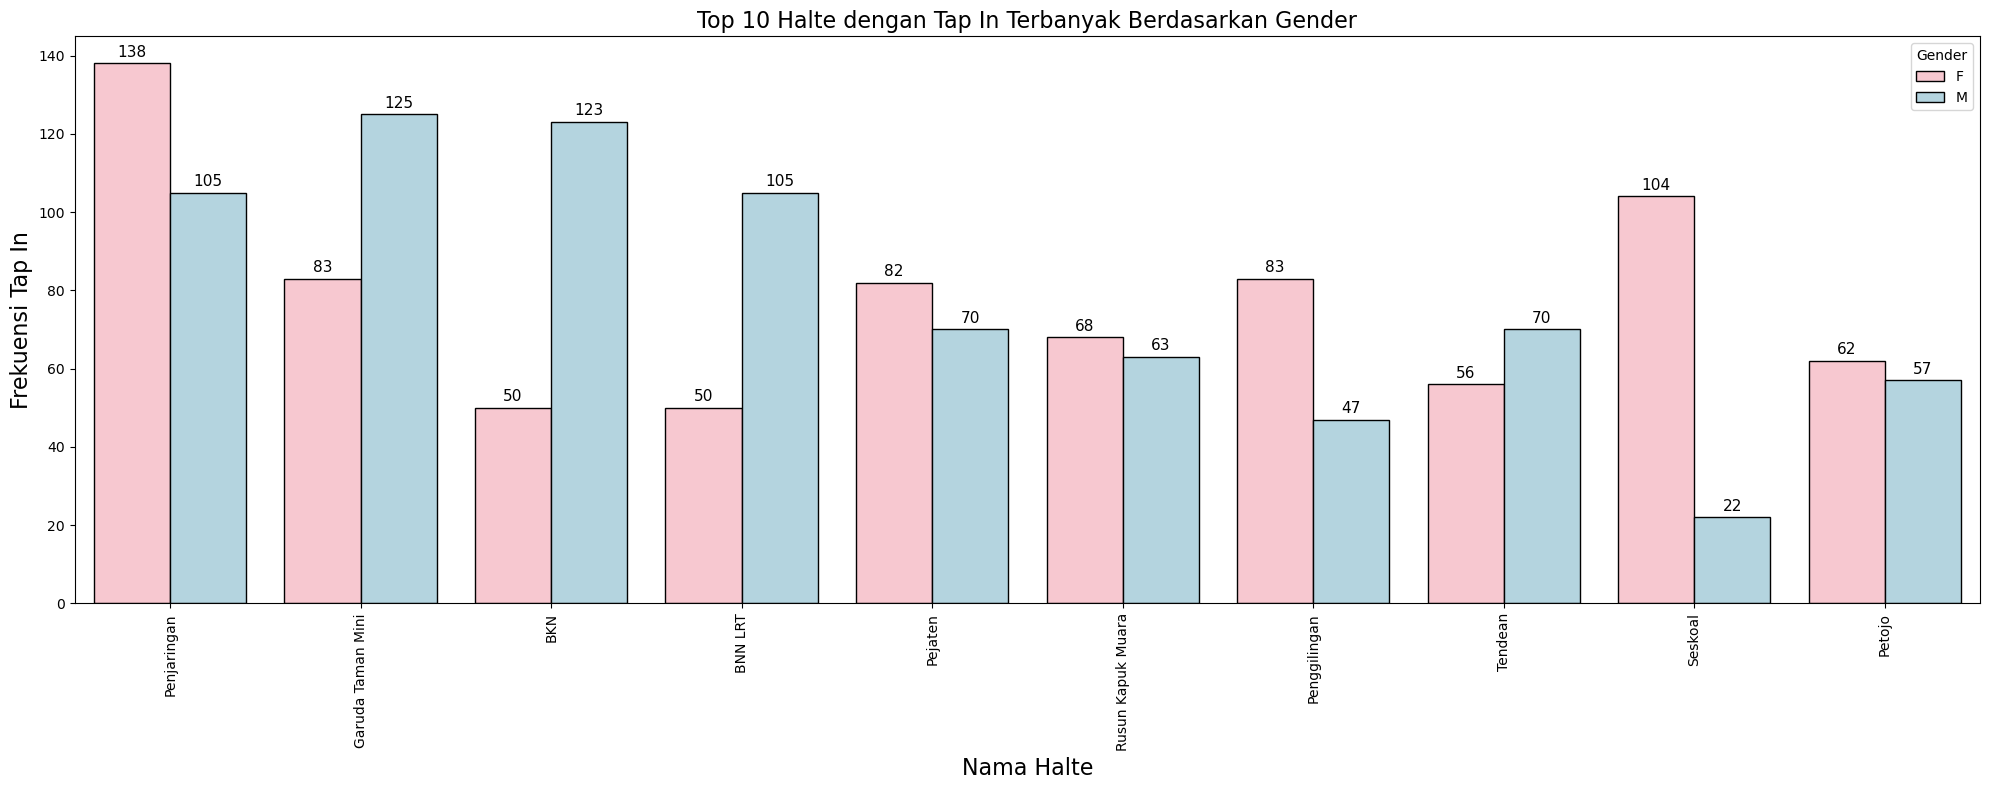

In [1274]:
# Menentukan 10 halte teratas berdasarkan frekuensi terbanyak Tap In
top_10_stops = df['tapInStopsName'].value_counts().head(10)

# Membuat DataFrame baru yang hanya berisi data dari 10 halte teratas
top_stops_df = df[df['tapInStopsName'].isin(top_10_stops.index)]

# Mengatur ukuran grafik
plt.figure(figsize=(20, 8))

# Mengatur warna untuk male dan female
colors = {'M': 'lightblue', 'F': 'pink'}

# Membuat barplot berdasarkan halte teratas dan gender (payCardSex)
plots = sns.countplot(data=top_stops_df, 
                      x='tapInStopsName', 
                      hue='payCardSex', 
                      order=top_10_stops.index,
                      palette=colors,
                      edgecolor='black')

# Menambahkan jumlah kunjungan di atas setiap bar
for bar in plots.patches:
    plots.annotate(format(int((bar.get_height()))),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                    size=11, xytext=(0, 8),
                    textcoords='offset points')
    
# Menambahkan judul dan label sb.x dan sb.y pada diagram
plt.title('Top 10 Halte dengan Tap In Terbanyak Berdasarkan Gender', fontsize = 16)
plt.xlabel('Nama Halte', fontsize = 16)
plt.ylabel('Frekuensi Tap In', fontsize = 16)

# Menampilkan plot
plt.legend(title='Gender')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [1275]:
# Mengidentifikasi nilai-nilai unik (nama halte) dalam kolom 'tapOutStopsName'
df['tapOutStopsName'].unique()

array(['Tegalan', 'Sampoerna Strategic', 'Simpang Kunir Kemukus', ...,
       'Gg. Trijaya IV Tebet Timur', 'MNC Studios', 'RSUD Cengkareng'],
      dtype=object)

In [1276]:
# Menghitung frekuensi yang sering muncul untuk melakukan Tap Out (keluar) pada setiap halte (tapOutStopsName)
tap_out_stops = df['tapOutStopsName'].value_counts().head(10)
tap_out_stops

tapOutStopsName
BKN                       1605
Penjaringan                265
Term. Senen                196
Monas                      167
Term. Kampung Rambutan     164
Ragunan                    151
Pinang Ranti               146
Kota Kasablanka            131
Pluit                      131
Tendean                    131
Name: count, dtype: int64

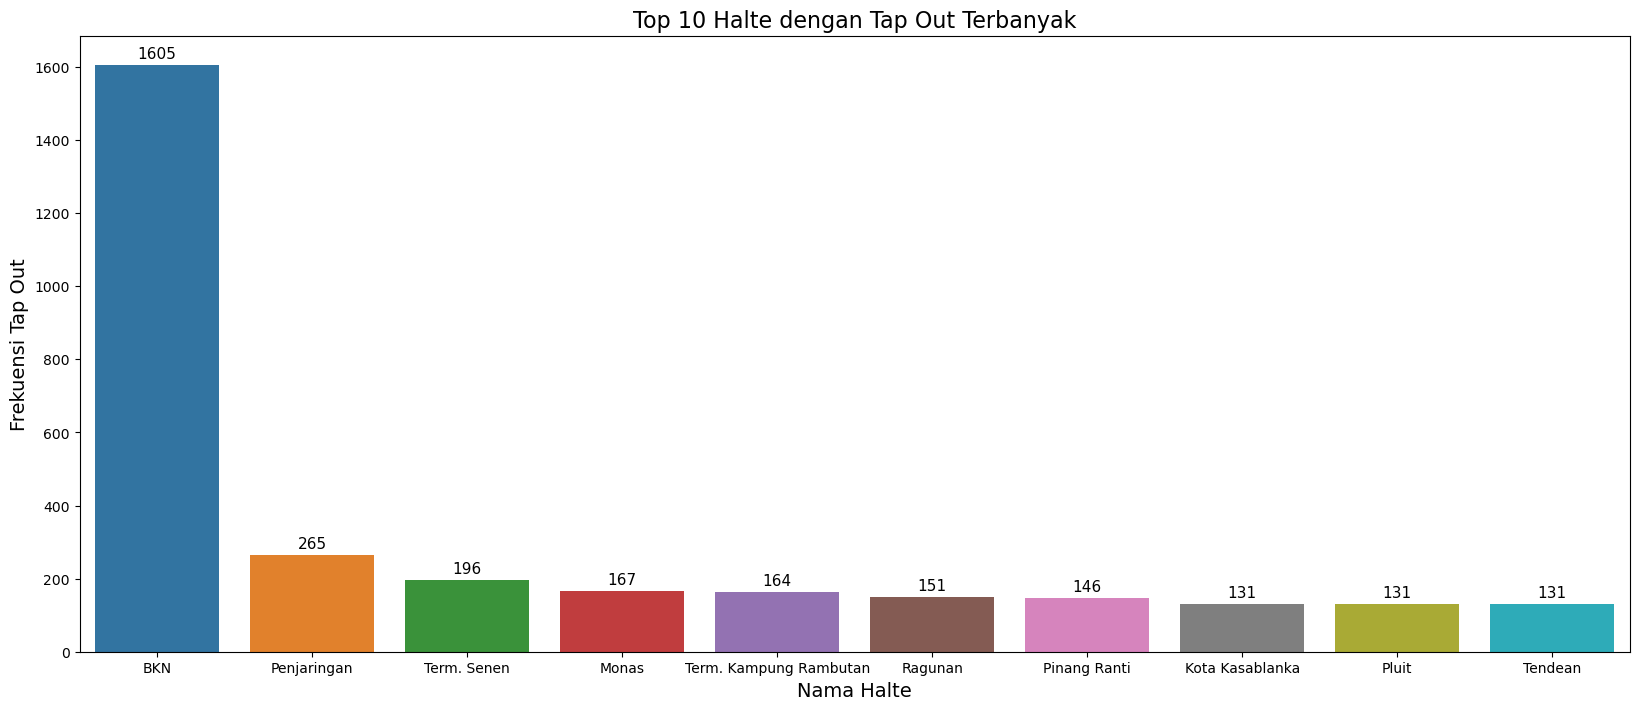

In [1277]:
# Mengatur ukuran grafik
plt.figure(figsize=(20,8))

# Membuat barplot
plots = sns.barplot(x=tap_out_stops.index,
                    y=tap_out_stops.values)

# Menambahkan jumlah kunjungan di atas setiap bar
for bar in plots.patches:
    plots.annotate(format(int((bar.get_height()))),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                    size=11, xytext=(0, 8),
                    textcoords='offset points')

# Menambahkan judul dan label sb.x dan sb.y pada diagram
plt.title('Top 10 Halte dengan Tap Out Terbanyak', fontsize = 16)
plt.xlabel('Nama Halte', fontsize = 14)
plt.ylabel('Frekuensi Tap Out', fontsize = 14)

# Menampilkan plot
plt.show()

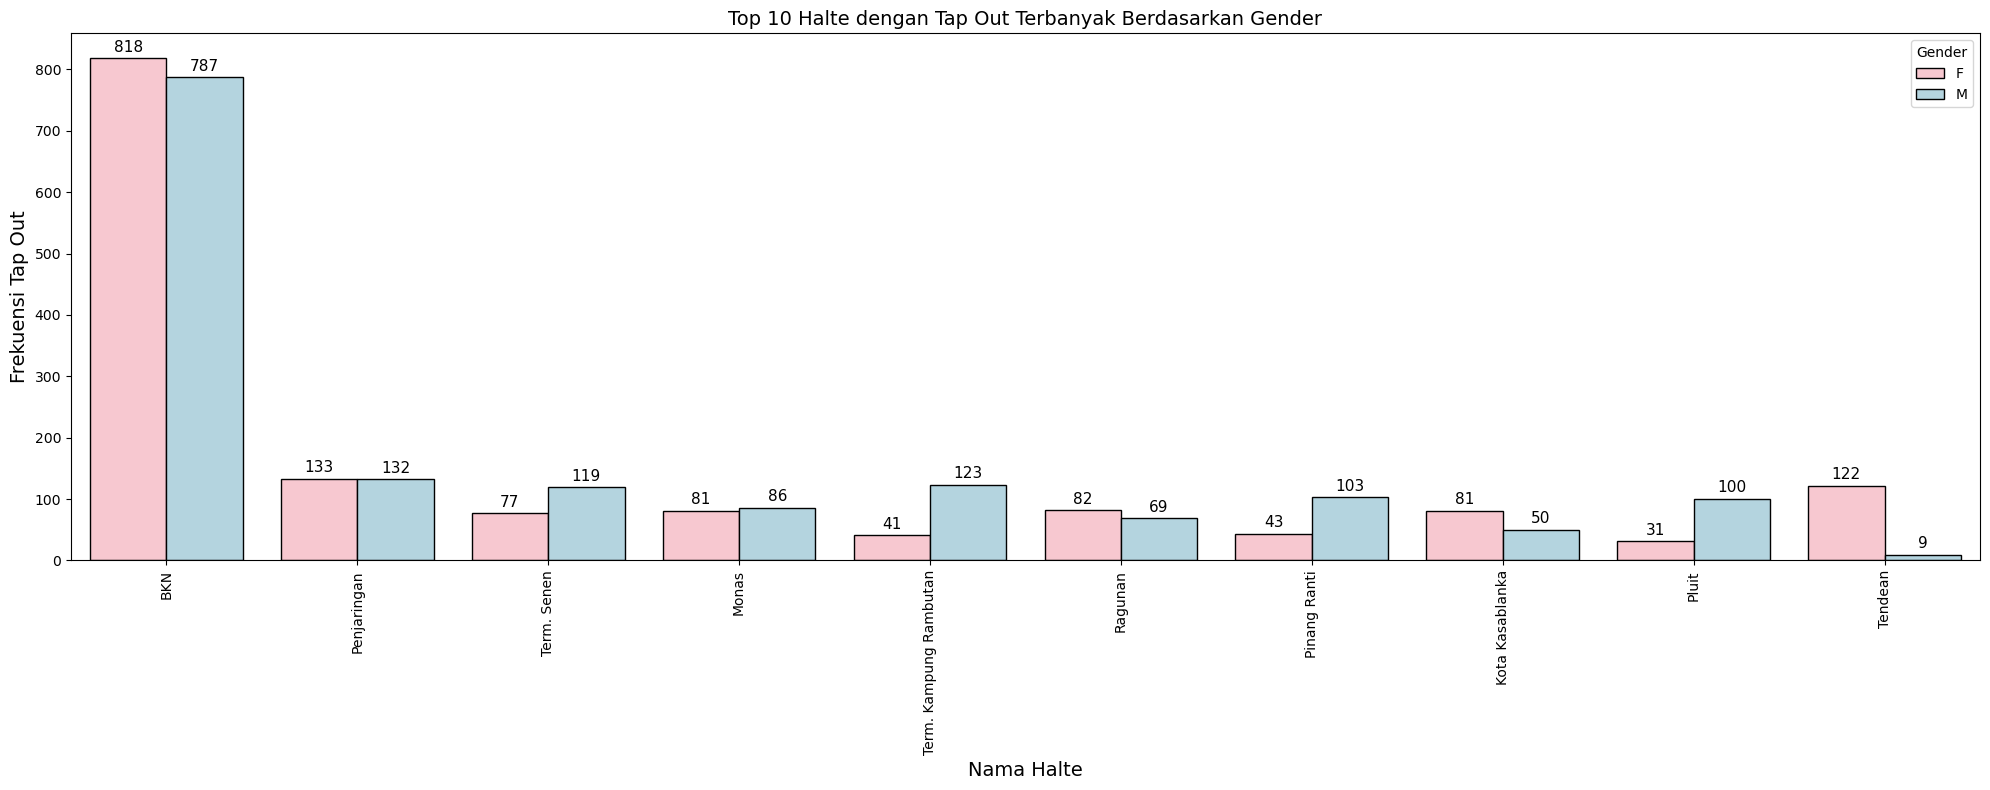

In [1278]:
# Menentukan 10 halte teratas berdasarkan frekuensi terbanyak Tap In
top_10_stops_out = df['tapOutStopsName'].value_counts().head(10)

# Membuat DataFrame baru yang hanya berisi data dari 10 halte teratas
top_stops_out_df = df[df['tapOutStopsName'].isin(top_10_stops_out.index)]

# Mengatur ukuran grafik
plt.figure(figsize=(20, 8))

# Mengatur warna untuk male dan female
colors = {'F': 'pink', 'M': 'lightblue'}

# Membuat barplot berdasarkan halte teratas dan gender (payCardSex)
plots = sns.countplot(data=top_stops_out_df, 
                      x='tapOutStopsName', 
                      hue='payCardSex', 
                      hue_order = ['F','M'],
                      order=top_10_stops_out.index,
                      palette=colors,
                      edgecolor='black')

# Menambahkan jumlah kunjungan di atas setiap bar
for bar in plots.patches:
    plots.annotate(format(int((bar.get_height()))),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                    size=11, xytext=(0, 8),
                    textcoords='offset points')
    
# Menambahkan judul dan label sb.x dan sb.y pada diagram
plt.title('Top 10 Halte dengan Tap Out Terbanyak Berdasarkan Gender', fontsize = 14)
plt.xlabel('Nama Halte', fontsize = 14)
plt.ylabel('Frekuensi Tap Out', fontsize = 14)

# Menampilkan plot
plt.legend(title='Gender')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Insight:**

- Top 10 Halte Tap In (Masuk): menunjukkan halte-halte di mana penumpang paling sering memulai perjalanan mereka dengan Transjakarta.

- Top 10 Halte Tap Out (Keluar): menunjukkan halte-halte di mana penumpang paling sering mengakhiri perjalanan mereka dengan Transjakarta.

- Dari data menunjukkan bahwa mayoritas pengguna TransJakarta banyak melakukan kegiatan di sekitar wilayah **BKN atau Penjaringan**.

- Mayoritas pengguna perempuan cenderung memilih Penjaringan dan Seskoal sebagai titik awal perjalanan mereka dengan Transjakarta. Sementara itu, pada fase akhir perjalanan, mayoritas pengguna perempuan cenderung memilih BKN dan Penjaringan sebagai titik akhir perjalanan.

**Saran :**
- **Peningkatan layanan pada halte-halte utama**: Fokus pada halte-halte teratas memberikan kesempatan untuk meningkatkan infrastruktur seperti peningkatan fasilitas, pemeliharaan kebersihan, atau penyediaan layanan yang lebih lengkap. Dengan memperbaiki halte-halte yang paling sering digunakan, TransJakarta dapat memberikan pengalaman yang lebih nyaman dan efisien kepada pengguna.

- **Keamanan khusus bagi pengguna perempuan**: Identifikasi halte-halte yang sering dikunjungi oleh pengguna perempuan penting untuk memperkuat aspek keamanan. Tindakan seperti peningkatan pencahayaan, kehadiran personel keamanan, atau penggunaan teknologi pemantauan dapat memberikan rasa aman yang lebih besar kepada pengguna perempuan di area-area tersebut. 

- **Penyediaan informasi yang mudah diketahui**: Menyediakan informasi yang jelas dan mudah diakses tentang jadwal, rute, dan layanan TransJakarta di halte-halte utama. Hal ini akan membantu pengguna untuk merencanakan perjalanan mereka dengan lebih baik.

In [1279]:
# Mengidentifikasi nilai-nilai unik (nama koridor) dalam kolom 'corridorName'
df['corridorName'].unique()

array(['Matraman Baru - Ancol',
       'Stasiun Tebet - Karet via Patra Kuningan', 'Pantai Maju - Kota',
       'Pulo Gebang - Pulo Gadung 2 via PIK', 'Tanjung Priok - Pluit',
       'Kalibata - Kuningan', 'Cibubur - Balai Kota', 'Rempoa - Blok M',
       'Kampung Melayu - Tanah Abang via Cikini', 'BKN - Blok M',
       'PGC 2 - Grogol 2', 'Pulo Gadung 2 - Tosari',
       'Pasar Minggu - Jagakarsa', 'Ciputat - Kampung Rambutan',
       'Ciledug - Tendean', 'Kebayoran Lama - Jelambar',
       'Pinang Ranti - Pluit', 'Terminal Tanjung Priok - Ancol Barat',
       'Poris Plawad - Bundaran Senayan', 'Cililitan - Condet',
       'Ragunan - Gelora Bung Karno',
       'Kampung Melayu - Pulo Gebang via BKT',
       'Kampung Melayu - Duren Sawit', 'Pulo Gebang - Matraman',
       'Pesanggrahan - Blok M', 'Rusun Flamboyan - Cengkareng',
       'Blok M - Kota', 'Kampung Rambutan - Ragunan', 'Senen - Blok M',
       'Pancoran - Kampung Rambutan', 'Senen - Lebak Bulus',
       'Jakarta Internationa

In [1280]:
# Menghitung frekuensi seberapa sering setiap koridor muncul 
corridor_counts = df['corridorName'].value_counts().head(10)
corridor_counts

corridorName
Cibubur - Balai Kota                           1845
Ciputat - CSW                                   383
Pulo Gadung - Monas                             343
Harmoni - Jakarta International Stadium         338
Kebayoran Lama - Tanah Abang                    333
Kalideres - Bundaran HI via Veteran             332
Kampung Rambutan - Pondok Gede                  329
Rusun Pondok Bambu - Walikota Jakarta Timur     326
Rusun Rawa Bebek - Kodamar                      312
Pasar Minggu - Tanah Abang                      303
Name: count, dtype: int64

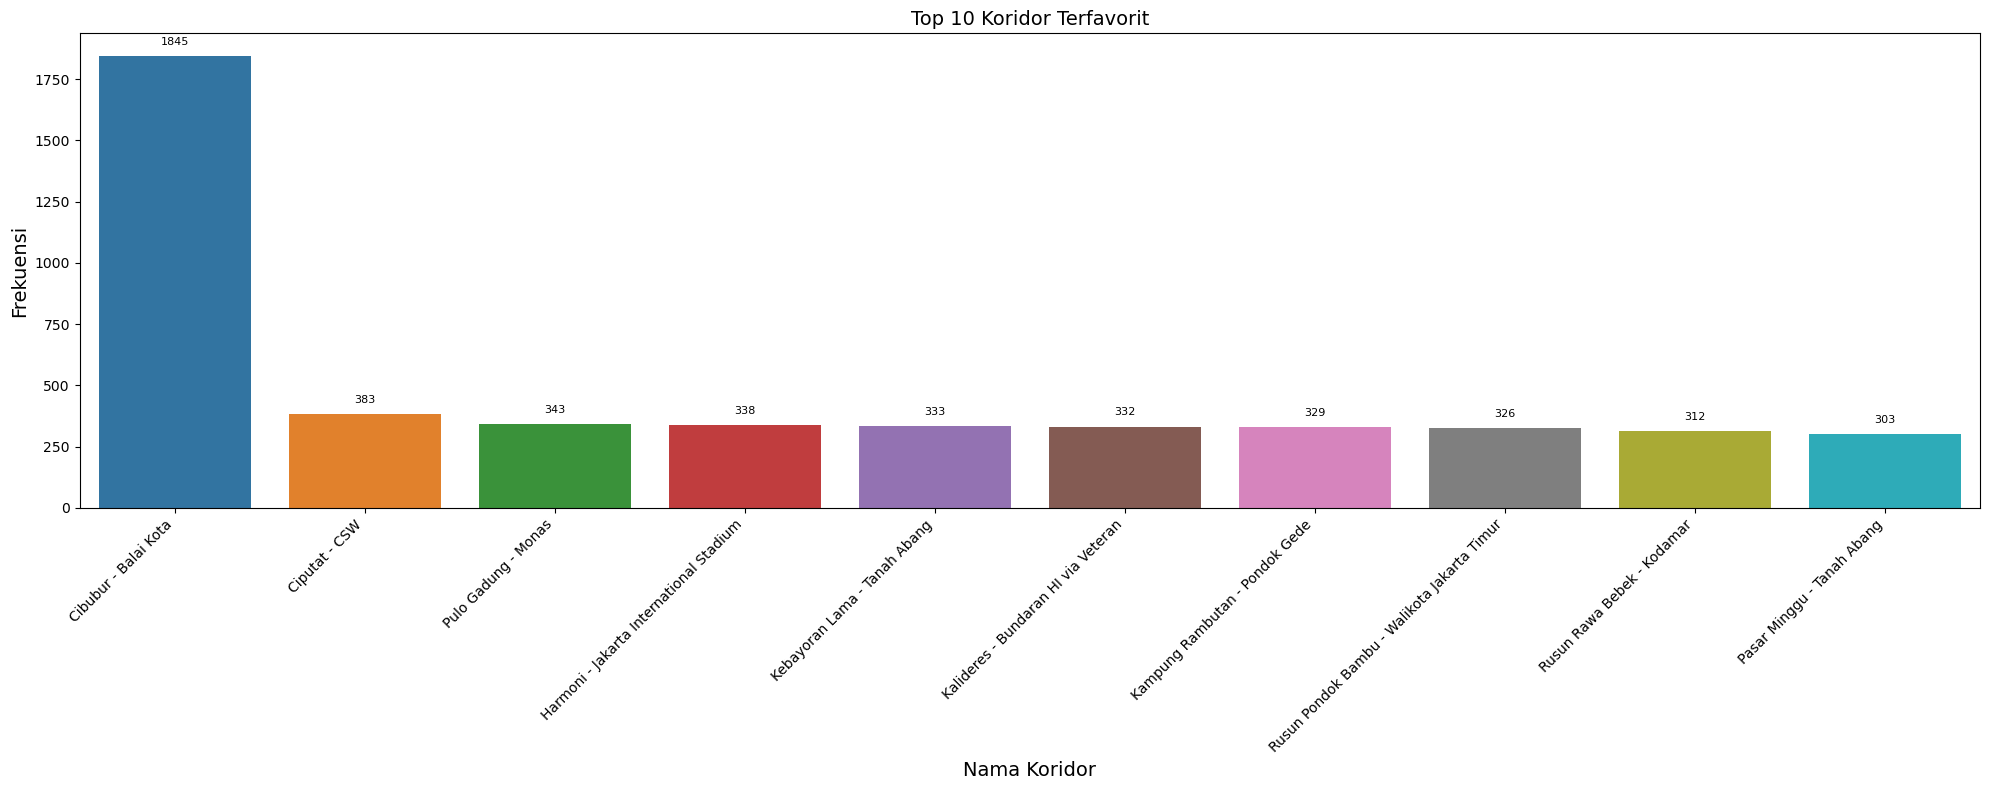

In [1281]:
# Mengatur ukuran grafik
plt.figure(figsize=(20,8))

# Membuat barplot
plots = sns.barplot(x=corridor_counts.index,
                    y=corridor_counts.values)

# Menambahkan jumlah kunjungan di atas setiap bar
for bar in plots.patches:
    plots.annotate(format(int((bar.get_height()))),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center',
                    size=8, xytext=(0, 8),
                    textcoords='offset points')

# Menambahkan judul dan label sb.x dan sb.y pada diagram
plt.title('Top 10 Koridor Terfavorit', fontsize= 14)
plt.xlabel('Nama Koridor', fontsize= 14)
plt.ylabel('Frekuensi', fontsize= 14)

# Mengatur rotasi dan posisi teks pada label sumbu x
plt.xticks(ticks=range(len(corridor_counts.index)), labels=corridor_counts.index, rotation=45, ha='right')
plt.tight_layout()

# Menampilkan plot
plt.show()

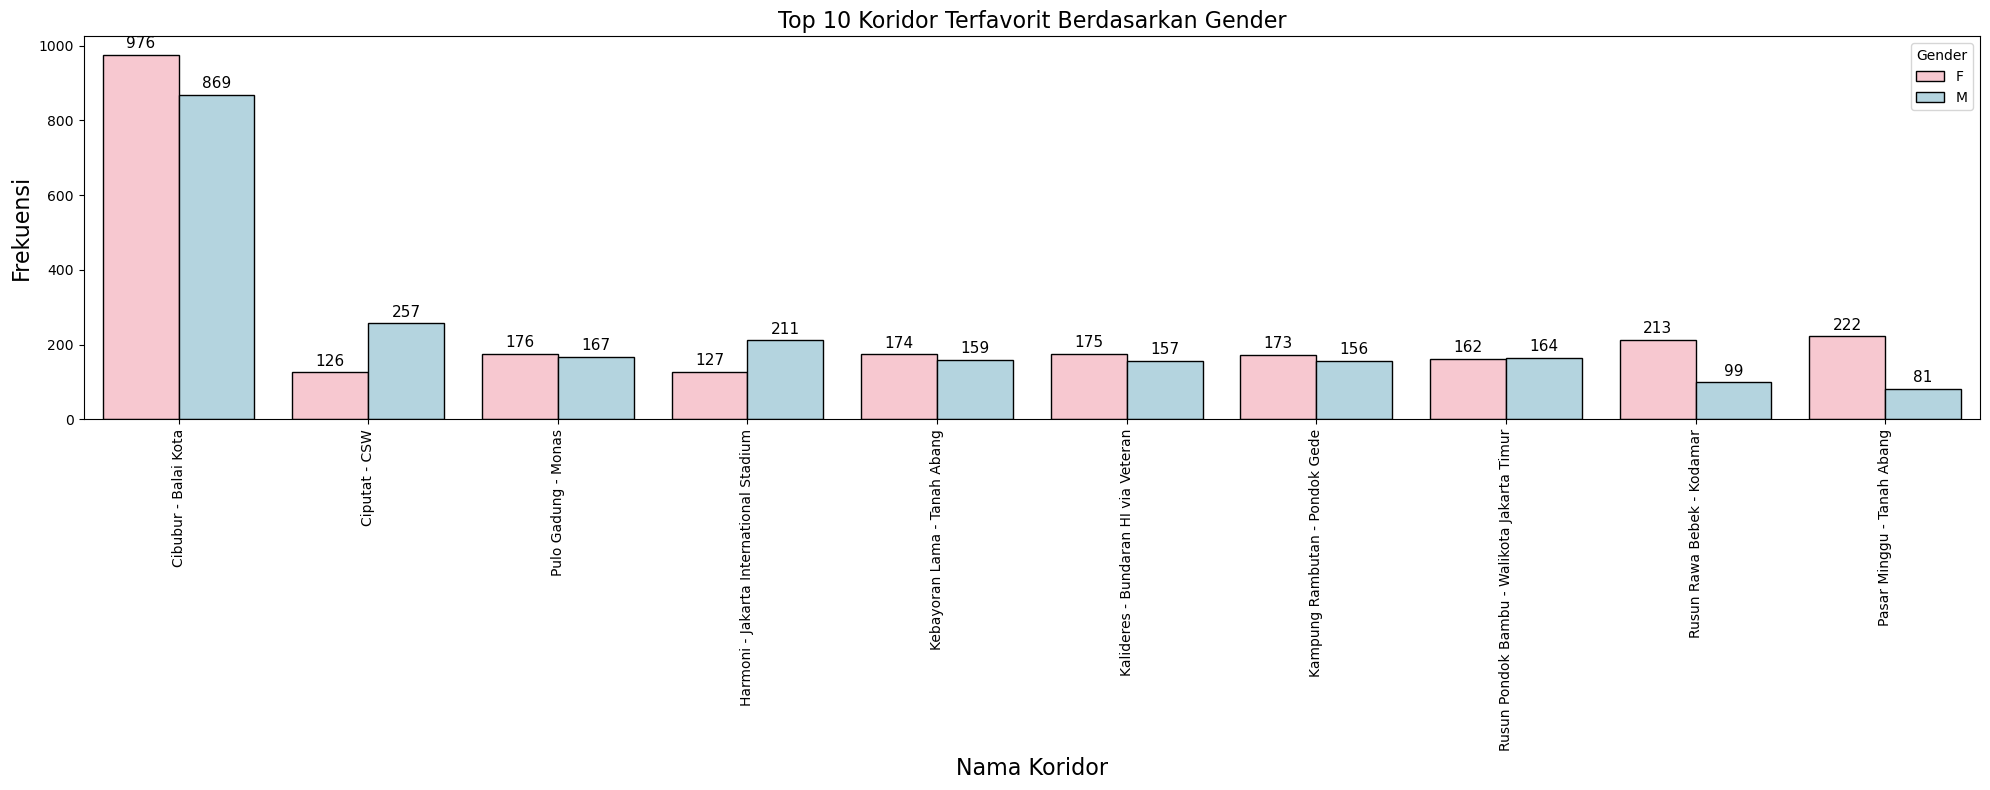

In [1282]:
# Mengambil 10 koridor teratas
top_10_corridors = df['corridorName'].value_counts().head(10)

# Filter data berdasarkan koridor teratas
top_corridor_df = df[df['corridorName'].isin(top_10_corridors.index)]

# Mengatur ukuran grafik
plt.figure(figsize=(20, 8))

# Menentukan warna untuk male dan female
colors = {'F': 'pink', 'M': 'lightblue'}

# Membuat count plot berdasarkan koridor teratas dan jenis kelamin (payCardSex)
plots = sns.countplot(data=top_corridor_df, 
                      x='corridorName', 
                      hue='payCardSex', 
                      hue_order=['F', 'M'],
                      order=top_10_corridors.index,
                      palette=colors,
                      edgecolor='black')

# Menambahkan jumlah tap out di atas setiap bar
for bar in plots.patches:
    plots.annotate(format(int(bar.get_height())),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   ha='center', va='center', size=11, xytext=(0, 8),
                   textcoords='offset points')

# Menambahkan judul dan label sumbu x dan y
plt.title('Top 10 Koridor Terfavorit Berdasarkan Gender', fontsize=16)
plt.xlabel('Nama Koridor', fontsize=16)
plt.ylabel('Frekuensi', fontsize=16)

# Menampilkan legenda dan menyesuaikan label sumbu x agar mudah dibaca
plt.legend(title='Gender')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


**Insight:**

Data menunjukkan bahwa **koridor Cibubur-Balai Kota** adalah yang paling sering digunakan oleh pengguna Transjakarta di antara 10 koridor utama. Ini menunjukkan bahwa rute ini memiliki daya tarik yang signifikan bagi penumpang Transjakarta. Kemungkinan, koridor ini melalui rute yang sangat diminati oleh pengguna karena menghubungkan dua wilayah yang memiliki tingkat kunjungan tinggi atau memiliki aksesibilitas yang baik ke berbagai tempat penting di kota. Selain itu, faktor lain seperti kepadatan penduduk di sekitar koridor, lokasi halte-halte strategis dan aksesibilitas ke pusat-pusat bisnis atau pendidikan mungkin juga memengaruhi tingginya frekuensi penggunaan koridor ini. Hal ini memberikan pandangan yang berharga bagi pihak Transjakarta untuk mengalokasikan sumber daya dengan lebih efektif serta merencanakan layanan yang lebih optimal di koridor tersebut.

**Saran :**
- **Pemahaman permintaan yang lebih baik**: Mengetahui koridor-koridor yang sering digunakan membantu Transjakarta memahami permintaan penumpang dan merencanakan kebutuhan transportasi lebih lanjut di rute-rute tersebut.

- **Perencanaan layanan yang efisien**: Fokus pada koridor-koridor diminati memungkinkan Transjakarta untuk meningkatkan frekuensi layanan, menyesuaikan jadwal dan bahkan mengalihkan rute guna meminimalkan waktu tunggu serta meningkatkan kenyamanan penumpang.

- **Potensi pengembangan lanjutan**: Koridor-koridor yang sering digunakan menjadi peluang untuk pengembangan infrastruktur. Menambah fasilitas seperti shelter yang lebih luas, informasi rute yang lebih jelas atau layanan tambahan di halte-halte tersebut dapat meningkatkan pengalaman keseluruhan bagi pengguna.

# **Kesimpulan**

### **1. Karakteristik Umum Pengguna Transjakarta:**

- *Distribusi Gender*: Persentase tinggi pengguna perempuan (53.2%) menunjukkan pertumbuhan yang signifikan. Ini membuka peluang bagi Transjakarta untuk menyesuaikan layanan agar lebih inklusif terhadap preferensi dan kebutuhan pengguna perempuan.

- *Distribusi Usia*: Dominasi pengguna dewasa (26-45 tahun) menandakan fokus pada kelompok usia ini. Hal ini menunjukkan perlunya penyesuaian layanan yang sesuai dengan karakteristik dan kebutuhan khusus kelompok usia ini dalam perjalanan mereka.

- *Jenis bank pembayaran*: Tingginya penggunaan Bank DKI menunjukkan keberhasilan kerjasama yang ada. Untuk meningkatkan variasi opsi pembayaran, Transjakarta dapat terus bekerjasama dengan Bank DKI dan merambah lebih banyak bank lainnya. Langkah ini akan memberikan pengguna opsi pembayaran yang lebih luas dan menarik.

### **2. Optimalisasi proses pengembangan Transjakarta untuk memenuhi kebutuhan pengguna secara efektif:**

- *Distribusi Jam Sibuk (Peak Hours)*: Dua periode jam sibuk menunjukkan pentingnya penyesuaian layanan pada waktu-waktu krusial untuk memenuhi kebutuhan pengguna.

- *Perbandingan Hari Kerja dan Akhir Pekan*: Lonjakan penggunaan pada hari kerja menunjukkan kesempatan untuk meningkatkan layanan yang lebih sesuai dengan rutinitas pengguna sehari-hari.

- *Top 10 Halte Tap In dan Tap Out*: Preferensi pada halte di wilayah BKN atau Penjaringan menandakan fokus aktivitas pengguna di daerah ini, mengindikasikan potensi peningkatan layanan di lokasi strategis.

- *Koridor Favorit dan Frekuensi Penggunaan*: Mengetahui koridor-koridor utama yang sering dipilih memberi wawasan mengenai kebutuhan rute yang populer serta memungkinkan peningkatan layanan pada rute-rute ini.